In [26]:
# Select the PANGEO kernel to be able to use this Notebook
import xarray as xr
import pandas as pd
import numpy as np
from netCDF4 import Dataset
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap

%matplotlib inline

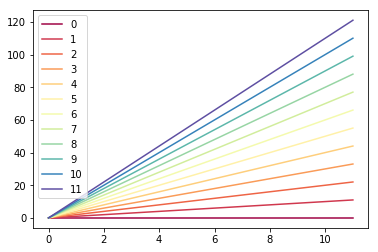

In [27]:
# Set a custom color bar
cmap = plt.cm.Spectral(np.linspace(0,1,12))
def linT(x,a):
    res=a*x
    return res

xaxis=np.arange(12) 

for id in np.arange(12):
    plt.plot(linT(xaxis,id),color=cmap[id],label=str(id))

plt.legend()



In [28]:
def ax_time(s_year,e_year):
    # Set the time axis
    num=12
    lgts_year=s_year    ;    t_months=(np.arange(num)*30.+15.)/365.   ;   start = 1
    while  lgts_year <= e_year  :
        y_years=np.tile(lgts_year,num)+t_months
        if start == 1:
            time_axis=y_years
            start=0
        else:
            time_axis=np.append(time_axis,y_years)

        lgts_year+=1

    return time_axis
    

>> ## Read available Obs. data set

In [29]:
# Ref experiment data
ds_OBSdata=xr.open_dataset('ICEFWC-Obs-LGTS_y19792018.nc')
ds_OBSdata

<xarray.Dataset>
Dimensions:              (time_axis_CRFFWCobs: 15, time_axis_IABPobs: 396, time_axis_NSIDC: 444, time_axis_PIO: 480)
Coordinates:
  * time_axis_PIO        (time_axis_PIO) float64 1.979e+03 ... 2.019e+03
  * time_axis_NSIDC      (time_axis_NSIDC) float64 1.979e+03 ... 2.016e+03
  * time_axis_IABPobs    (time_axis_IABPobs) float64 1.979e+03 ... 2.012e+03
  * time_axis_CRFFWCobs  (time_axis_CRFFWCobs) float32 2003.6658 ... 2017.6658
Data variables:
    LongTS_OBS_icevol    (time_axis_PIO) float32 ...
    LongTS_OBS_iceare    (time_axis_NSIDC) float32 ...
    LongTS_OBS_iceext    (time_axis_NSIDC) float32 ...
    IABPObservations     (time_axis_IABPobs) float64 ...
    LongTS_OBS_CRFFWC    (time_axis_CRFFWCobs) float32 ...

In [30]:
# Redefine a time axis using pandas
ds_OBSdataNEW=xr.Dataset()

ds_OBSdataNEW['LongTS_OBS_icevol']=(('time_axis_PIO'),ds_OBSdata['LongTS_OBS_icevol'])
ds_OBSdataNEW['LongTS_OBS_iceare']=(('time_axis_NSIDC'),ds_OBSdata['LongTS_OBS_iceare'])
ds_OBSdataNEW['LongTS_OBS_iceext']=(('time_axis_NSIDC'),ds_OBSdata['LongTS_OBS_iceext'])
ds_OBSdataNEW['IABPObservations']=(('time_axis_IABPobs'),ds_OBSdata['IABPObservations'])
ds_OBSdataNEW['LongTS_OBS_CRFFWC']=(('time_axis_CRFFWCobs'),ds_OBSdata['LongTS_OBS_CRFFWC'])

ds_OBSdataNEW.coords['time_axis_PIO']=(('time_axis_PIO'),pd.date_range(start='1979-01',end='2018-12',freq='1MS')+ pd.DateOffset(days=14))
ds_OBSdataNEW.coords['time_axis_NSIDC']=(('time_axis_NSIDC'),pd.date_range(start='1979-01',end='2015-12',freq='1MS')+ pd.DateOffset(days=14))
ds_OBSdataNEW.coords['time_axis_IABPobs']=(('time_axis_IABPobs'),pd.date_range(start='1979-01',end='2011-12',freq='1MS')+ pd.DateOffset(days=14))
ds_OBSdataNEW.coords['time_axis_CRFFWCobs']=(('time_axis_CRFFWCobs'),pd.date_range(start='2003',end='2018',freq='1Y')+ pd.DateOffset(days=-183))

>> ## Read model exps. data

In [31]:
DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-ERA01-MEAN/MONITOR/NCDF-CREG025.L75/"
filein="CREG025.L75-ERA01_ICEFWCWEK-LGTS_y1979LASTy.nc"

Tise_ERA01=xr.open_dataset(DATAP+filein)
Time_era01=ax_time(1979.,2015.)

In [32]:
DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-ERA01NEM405LAS-MEAN/MONITOR/NCDF-CREG025.L75/"
filein="CREG025.L75-ERA01NEM405LAS_ICEFWC-LGTS_y1979LASTy.nc"

Tise_ERA01LAS=xr.open_dataset(DATAP+filein)
Time_era01LAS=ax_time(1979.,2009.)

In [33]:
DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420/"
filein="CREG025.L75-NEMO420_ICEFWCWEK-LGTS_y1979LASTy.nc"

Tise_NEMO420=xr.open_dataset(DATAP+filein)
Time_NEMO420=ax_time(1979.,2015.)

In [34]:
#DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420IRW/"
#filein="CREG025.L75-NEMO420IRW_ICEFWCWEK-LGTS_y1979LASTy.nc"

#Tise_NEMO420IRW=xr.open_dataset(DATAP+filein)
#Time_NEMO420IRW=ax_time(1979.,2000.)

In [35]:
#DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420PCA/"
#filein="CREG025.L75-NEMO420PCA_ICEFWCWEK-LGTS_y1979LASTy.nc"

#Tise_NEMO420PCA=xr.open_dataset(DATAP+filein)
#Time_NEMO420PCA=ax_time(1979.,2009.)

In [36]:
DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420OPA/"
filein="CREG025.L75-NEMO420OPA_ICEFWCWEK-LGTS_y1979LASTy.nc"

Tise_NEMO420OPA=xr.open_dataset(DATAP+filein)
Time_NEMO420OPA=ax_time(1979.,2009.)

In [37]:
DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420CIO/"
filein="CREG025.L75-NEMO420CIO_ICEFWCWEK-LGTS_y1979LASTy.nc"

Tise_NEMO420CIO=xr.open_dataset(DATAP+filein)
Time_NEMO420CIO=ax_time(1979.,2009.)

In [38]:
#DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420DRG/"
#filein="CREG025.L75-NEMO420DRG_ICEFWCWEK-LGTS_y1979LASTy.nc"

#Tise_NEMO420DRG=xr.open_dataset(DATAP+filein)
#Time_NEMO420DRG=ax_time(1979.,2000.)

In [39]:
DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420RAT/"
filein="CREG025.L75-NEMO420RAT_ICEFWCWEK-LGTS_y1979LASTy.nc"

Tise_NEMO420RAT=xr.open_dataset(DATAP+filein)
Time_NEMO420RAT=ax_time(1979.,2009.)

In [40]:
DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420PSA/"
filein="CREG025.L75-NEMO420PSA_ICEFWCWEK-LGTS_y1979LASTy.nc"

Tise_NEMO420PSA=xr.open_dataset(DATAP+filein)
Time_NEMO420PSA=ax_time(1979.,2009.)

In [41]:
DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420LAN/"
filein="CREG025.L75-NEMO420LAN_ICEFWCWEK-LGTS_y1979LASTy.nc"

Tise_NEMO420LAN=xr.open_dataset(DATAP+filein)
Time_NEMO420LAN=ax_time(1979.,2009.)

In [42]:
DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420QUA/"
filein="CREG025.L75-NEMO420QUA_ICEFWCWEK-LGTS_y1979LASTy.nc"

Tise_NEMO420QUA=xr.open_dataset(DATAP+filein)
Time_NEMO420QUA=ax_time(1979.,2015.)

In [43]:
DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420REY/"
filein="CREG025.L75-NEMO420REY_ICEFWCWEK-LGTS_y1979LASTy.nc"

Tise_NEMO420REY=xr.open_dataset(DATAP+filein)
Time_NEMO420REY=ax_time(1979.,2009.)

In [44]:
DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420YES/"
filein="CREG025.L75-NEMO420YES_ICEFWCWEK-LGTS_y1979LASTy.nc"

Tise_NEMO420YES=xr.open_dataset(DATAP+filein)
Time_NEMO420YES=ax_time(1979.,2009.)

In [45]:
DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420RIP/"
filein="CREG025.L75-NEMO420RIP_ICEFWCWEK-LGTS_y1979LASTy.nc"

Tise_NEMO420RIP=xr.open_dataset(DATAP+filein)
Time_NEMO420RIP=pd.date_range(start='1979-01',end='2009-12',freq='1MS')+ pd.DateOffset(days=14)

In [46]:
DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420COO/"
filein="CREG025.L75-NEMO420COO_ICEFWCWEK-LGTS_y1979LASTy.nc"

Tise_NEMO420COO=xr.open_dataset(DATAP+filein)
Time_NEMO420COO=ax_time(1979.,1996.)

In [47]:
DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420BLP/"
filein="CREG025.L75-NEMO420BLP_ICEFWCWEK-LGTS_y1979LASTy.nc"

Tise_NEMO420BLP=xr.open_dataset(DATAP+filein)
Time_NEMO420BLP=pd.date_range(start='1979-01',end='2009-12',freq='1MS')+ pd.DateOffset(days=14)

In [48]:
DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420ASH/"
filein="CREG025.L75-NEMO420ASH_ICEFWCWEK-LGTS_y1979LASTy.nc"

Tise_NEMO420ASH=xr.open_dataset(DATAP+filein)
Time_NEMO420ASH=pd.date_range(start='1979-01',end='2009-12',freq='1MS')+ pd.DateOffset(days=14)

In [49]:
DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420ICE/"
filein="CREG025.L75-NEMO420ICE_ICEFWCWEK-LGTS_y1979LASTy.nc"

Tise_NEMO420ICE=xr.open_dataset(DATAP+filein)
Time_NEMO420ICE=pd.date_range(start='1979-01',end='2009-12',freq='1MS')+ pd.DateOffset(days=14)

In [50]:
DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420TAU/"
filein="CREG025.L75-NEMO420TAU_ICEFWCWEK-LGTS_y1979LASTy.nc"

Tise_NEMO420TAU=xr.open_dataset(DATAP+filein)
Time_NEMO420TAU=pd.date_range(start='1979-01',end='2009-12',freq='1MS')+ pd.DateOffset(days=14)

>> ## ICE TiSe plot

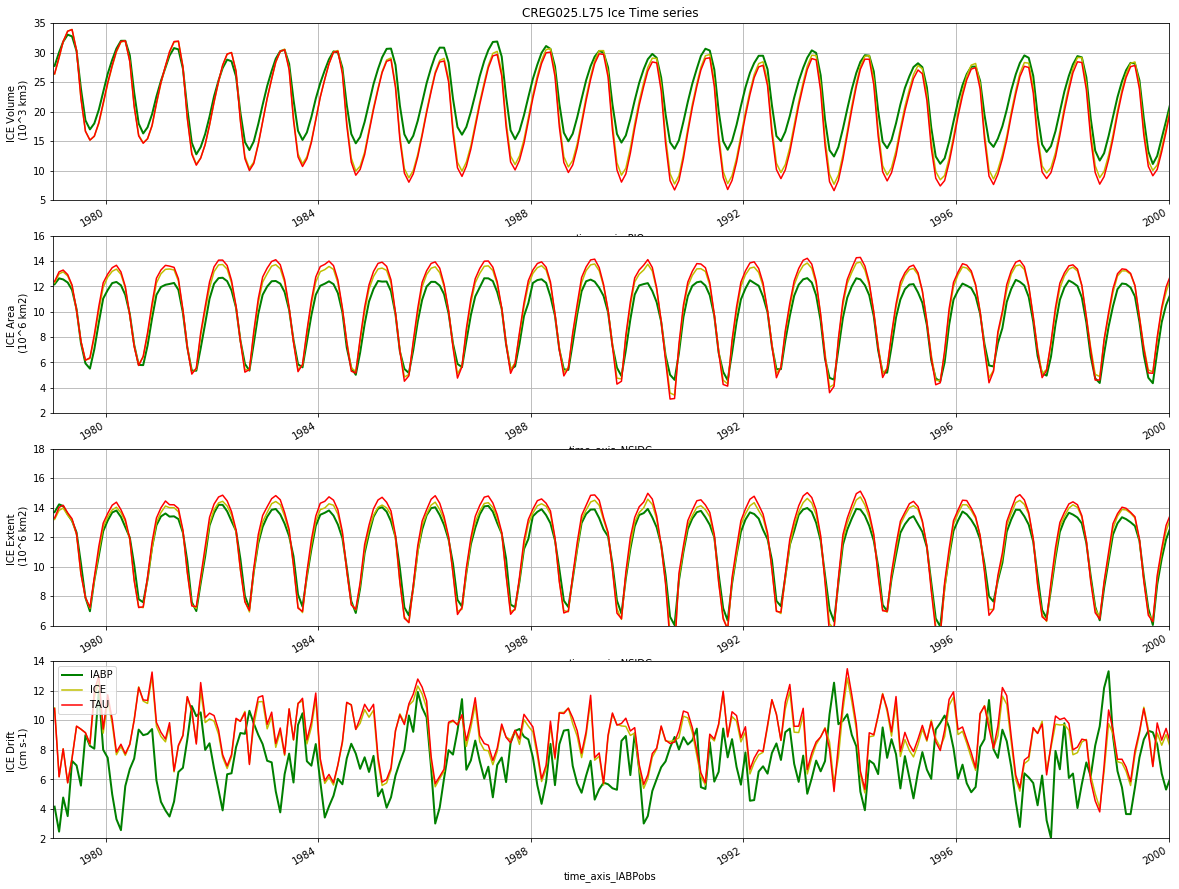

In [51]:

year_min=str(1979)
year_max=str(2000)
# FullTime year_max=2000
plt.figure(figsize=(20,15))
plt.subplot(411)
(ds_OBSdataNEW['LongTS_OBS_icevol']*1e-12).plot(color='g',linewidth=2,label='PIOMAS')
#plt.plot(Time_era01,Tise_ERA01['LongTS_ibgvoltot']*1e-3,color='r',label='NEMO3.6')
#plt.plot(Time_era01LAS,Tise_ERA01LAS['LongTS_ibgvoltot']*1e-3,color='y',label='NEMO4.0.5')
#plt.plot(Time_NEMO420,Tise_NEMO420['LongTS_ibgvoltot']*1e-3,color='b',label='NEMO4.2.0')
#plt.plot(Time_NEMO420IRW,Tise_NEMO420IRW['LongTS_ibgvoltot']*1e-3,color=cmap[3],label='IRW')
#plt.plot(Time_NEMO420PCA,Tise_NEMO420PCA['LongTS_ibgvoltot']*1e-3,color=cmap[3],label='PCA')
#plt.plot(Time_NEMO420OPA,Tise_NEMO420OPA['LongTS_ibgvoltot']*1e-3,color=cmap[3],label='OPA')
#plt.plot(Time_NEMO420CIO,Tise_NEMO420CIO['LongTS_ibgvoltot']*1e-3,color='grey',label='CIO')
#plt.plot(Time_NEMO420DRG,Tise_NEMO420DRG['LongTS_ibgvoltot']*1e-3,color='purple',label='DRG')
#plt.plot(Time_NEMO420RAT,Tise_NEMO420RAT['LongTS_ibgvoltot']*1e-3,color='purple',label='RAT')
#plt.plot(Time_NEMO420PSA,Tise_NEMO420PSA['LongTS_ibgvoltot']*1e-3,color='grey',label='PSA')
#plt.plot(Time_NEMO420LAN,Tise_NEMO420LAN['LongTS_ibgvoltot']*1e-3,color=cmap[8],label='LAN')
#plt.plot(Time_NEMO420QUA,Tise_NEMO420QUA['LongTS_ibgvoltot']*1e-3,color=cmap[8],label='QUA')
#plt.plot(Time_NEMO420REY,Tise_NEMO420REY['LongTS_ibgvoltot']*1e-3,color='purple',label='REY')
#plt.plot(Time_NEMO420RIP,Tise_NEMO420RIP['LongTS_ibgvoltot']*1e-3,color='r',label='RIP')
#plt.plot(Time_NEMO420BLP,Tise_NEMO420BLP['LongTS_ibgvoltot']*1e-3,color='y',label='BLP')
#plt.plot(Time_NEMO420ASH,Tise_NEMO420ASH['LongTS_ibgvoltot']*1e-3,color='r',label='ASH')
plt.plot(Time_NEMO420ICE,Tise_NEMO420ICE['LongTS_ibgvoltot']*1e-3,color='y',label='ICE')
plt.plot(Time_NEMO420TAU,Tise_NEMO420TAU['LongTS_ibgvoltot']*1e-3,color='r',label='TAU')

plt.xlim([year_min,year_max])
plt.ylim([5,35])
plt.title('CREG025.L75 Ice Time series')
plt.ylabel('ICE Volume \n (10^3 km3)')
plt.grid(True)
#plt.legend(loc='upper left')

plt.subplot(412)
(ds_OBSdataNEW['LongTS_OBS_iceare']*1e-12).plot(color='g', linewidth=2,label='NSIDC')
#plt.plot(Time_era01,Tise_ERA01['LongTS_ibgarea']*1e-6,color='r',label='NEMO3.6')
#plt.plot(Time_era01LAS,Tise_ERA01LAS['LongTS_ibgarea']*1e-6,color='y',label='NEMO4.0.5')
#plt.plot(Time_NEMO420,Tise_NEMO420['LongTS_ibgarea']*1e-6,color='b',label='NEMO4.2.0')
#plt.plot(Time_NEMO420IRW,Tise_NEMO420IRW['LongTS_ibgarea']*1e-6,color=cmap[3],label='IRW')
#plt.plot(Time_NEMO420PCA,Tise_NEMO420PCA['LongTS_ibgarea']*1e-6,color=cmap[3],label='PCA')
#plt.plot(Time_NEMO420OPA,Tise_NEMO420OPA['LongTS_ibgarea']*1e-6,color=cmap[3],label='OPA')
#plt.plot(Time_NEMO420CIO,Tise_NEMO420CIO['LongTS_ibgarea']*1e-6,color='grey',label='CIO')
#plt.plot(Time_NEMO420DRG,Tise_NEMO420DRG['LongTS_ibgarea']*1e-6,color='purple',label='DRG')
#plt.plot(Time_NEMO420RAT,Tise_NEMO420RAT['LongTS_ibgarea']*1e-6,color='purple',label='RAT')
#plt.plot(Time_NEMO420PSA,Tise_NEMO420PSA['LongTS_ibgarea']*1e-6,color='grey',label='PSA')
#plt.plot(Time_NEMO420LAN,Tise_NEMO420LAN['LongTS_ibgarea']*1e-6,color=cmap[8],label='LAN')
#plt.plot(Time_NEMO420REY,Tise_NEMO420REY['LongTS_ibgarea']*1e-6,color='purple',label='REY')
#plt.plot(Time_NEMO420QUA,Tise_NEMO420QUA['LongTS_ibgarea']*1e-6,color=cmap[8],label='QUA')
#plt.plot(Time_NEMO420YES,Tise_NEMO420YES['LongTS_ibgarea']*1e-6,color=cmap[3],label='YES')
#plt.plot(Time_NEMO420RIP,Tise_NEMO420RIP['LongTS_ibgarea']*1e-6,color='r',label='RIP')
#plt.plot(Time_NEMO420BLP,Tise_NEMO420BLP['LongTS_ibgarea']*1e-6,color='y',label='BLP')
#plt.plot(Time_NEMO420ASH,Tise_NEMO420ASH['LongTS_ibgarea']*1e-6,color='r',label='ASH')
plt.plot(Time_NEMO420ICE,Tise_NEMO420ICE['LongTS_ibgarea']*1e-6,color='y',label='ICE')
plt.plot(Time_NEMO420TAU,Tise_NEMO420TAU['LongTS_ibgarea']*1e-6,color='r',label='TAU')

plt.ylabel('ICE Area \n (10^6 km2)')
plt.xlim([year_min,year_max])
plt.ylim([2,16])
plt.grid(True)
#plt.legend(loc='upper left')

plt.subplot(413)
(ds_OBSdataNEW['LongTS_OBS_iceext']*1e-12).plot(color='g', linewidth=2,label='NSIDC')
#plt.plot(Time_era01,Tise_ERA01['LongTS_sice_ext']*1e-12,color='r',label='NEMO3.6')
#plt.plot(Time_era01LAS,Tise_ERA01LAS['LongTS_sice_ext']*1e-12,color='y',label='NEMO4.0.5')
#plt.plot(Time_NEMO420,Tise_NEMO420['LongTS_sice_ext']*1e-12,color='b',label='NEMO4.2.0')
#plt.plot(Time_NEMO420IRW,Tise_NEMO420IRW['LongTS_sice_ext']*1e-12,color=cmap[3],label='IRW')
#plt.plot(Time_NEMO420PCA,Tise_NEMO420PCA['LongTS_sice_ext']*1e-12,color=cmap[3],label='PCA')
#plt.plot(Time_NEMO420OPA,Tise_NEMO420OPA['LongTS_sice_ext']*1e-12,color=cmap[3],label='OPA')
#plt.plot(Time_NEMO420CIO,Tise_NEMO420CIO['LongTS_sice_ext']*1e-12,color='grey',label='CIO')
#plt.plot(Time_NEMO420DRG,Tise_NEMO420DRG['LongTS_sice_ext']*1e-12,color='purple',label='DRG')
#plt.plot(Time_NEMO420RAT,Tise_NEMO420RAT['LongTS_sice_ext']*1e-12,color='purple',label='RAT')
#plt.plot(Time_NEMO420PSA,Tise_NEMO420PSA['LongTS_sice_ext']*1e-12,color='grey',label='PSA')
#plt.plot(Time_NEMO420LAN,Tise_NEMO420LAN['LongTS_sice_ext']*1e-12,color=cmap[8],label='LAN')
#plt.plot(Time_NEMO420REY,Tise_NEMO420REY['LongTS_sice_ext']*1e-12,color='purple',label='REY')
#plt.plot(Time_NEMO420QUA,Tise_NEMO420QUA['LongTS_sice_ext']*1e-12,color=cmap[8],label='QUA')
#plt.plot(Time_NEMO420YES,Tise_NEMO420YES['LongTS_sice_ext']*1e-12,color=cmap[3],label='YES')
#plt.plot(Time_NEMO420RIP,Tise_NEMO420RIP['LongTS_sice_ext']*1e-12,color='r',label='RIP')
#plt.plot(Time_NEMO420BLP,Tise_NEMO420BLP['LongTS_sice_ext']*1e-12,color='y',label='BLP')
#plt.plot(Time_NEMO420ASH,Tise_NEMO420ASH['LongTS_sice_ext']*1e-12,color='r',label='ASH')
plt.plot(Time_NEMO420ICE,Tise_NEMO420ICE['LongTS_sice_ext']*1e-12,color='y',label='ICE')
plt.plot(Time_NEMO420TAU,Tise_NEMO420TAU['LongTS_sice_ext']*1e-12,color='r',label='TAU')

plt.ylabel('ICE Extent \n (10^6 km2)')
plt.xlim([year_min,year_max])
plt.ylim([6,18])
plt.grid(True)
#plt.legend()

if True:
    plt.subplot(414)
    (ds_OBSdataNEW['IABPObservations']*100.).plot(color='g', linewidth=2,label='IABP')
    #plt.plot(Time_era01,Tise_ERA01['LongTS_VEICE']*1e2,color='r',label='NEMO3.6')
    #plt.plot(Time_era01LAS,Tise_ERA01LAS['LongTS_VEICE']*1e2,color='y',label='NEMO4.0.5')
    #plt.plot(Time_NEMO420,Tise_NEMO420['LongTS_VEICE']*1e2,color='b',label='NEMO4.2.0')
    #plt.plot(Time_NEMO420IRW,Tise_NEMO420IRW['LongTS_VEICE']*1e2,color=cmap[3],label='IRW')    
    #plt.plot(Time_NEMO420PCA,Tise_NEMO420PCA['LongTS_VEICE']*1e2,color=cmap[3],label='PCA')    
    #plt.plot(Time_NEMO420OPA,Tise_NEMO420OPA['LongTS_VEICE']*1e2,color=cmap[3],label='OPA')    
    #plt.plot(Time_NEMO420CIO,Tise_NEMO420CIO['LongTS_VEICE']*1e2,color='grey',label='CIO')    
    #plt.plot(Time_NEMO420DRG,Tise_NEMO420DRG['LongTS_VEICE']*1e2,color='purple',label='DRG')    
    #plt.plot(Time_NEMO420RAT,Tise_NEMO420RAT['LongTS_VEICE']*1e2,color='purple',label='RAT')    
    #plt.plot(Time_NEMO420PSA,Tise_NEMO420PSA['LongTS_VEICE']*1e2,color='grey',label='PSA')
    #plt.plot(Time_NEMO420LAN,Tise_NEMO420LAN['LongTS_VEICE']*1e2,color=cmap[8],label='LAN')
    #plt.plot(Time_NEMO420REY,Tise_NEMO420REY['LongTS_VEICE']*1e2,color='purple',label='REY')
    #plt.plot(Time_NEMO420QUA,Tise_NEMO420QUA['LongTS_VEICE']*1e2,color=cmap[8],label='QUA')  
    #plt.plot(Time_NEMO420YES,Tise_NEMO420YES['LongTS_VEICE']*1e2,color=cmap[3],label='YES')
    #plt.plot(Time_NEMO420RIP,Tise_NEMO420RIP['LongTS_VEICE']*1e2,color='r',label='RIP')
    #plt.plot(Time_NEMO420BLP,Tise_NEMO420BLP['LongTS_VEICE']*1e2,color='y',label='BLP')    
    #plt.plot(Time_NEMO420ASH,Tise_NEMO420ASH['LongTS_VEICE']*1e2,color='r',label='ASH')
    plt.plot(Time_NEMO420ICE,Tise_NEMO420ICE['LongTS_VEICE']*1e2,color='y',label='ICE')
    plt.plot(Time_NEMO420TAU,Tise_NEMO420TAU['LongTS_VEICE']*1e2,color='r',label='TAU')
    
    plt.ylabel('ICE Drift \n (cm s-1)')
    plt.xlim([year_min,year_max])
    plt.ylim([2.,14.])
    plt.grid(True)
    plt.legend(loc='upper left')

savefig=False
if savefig : plt.savefig('./CREG025.L75_y'+str(year_min+1)+str(year_max)+'IceTiSe.png',dpi=300)
savefig=False



>> # FWC TiSe plot

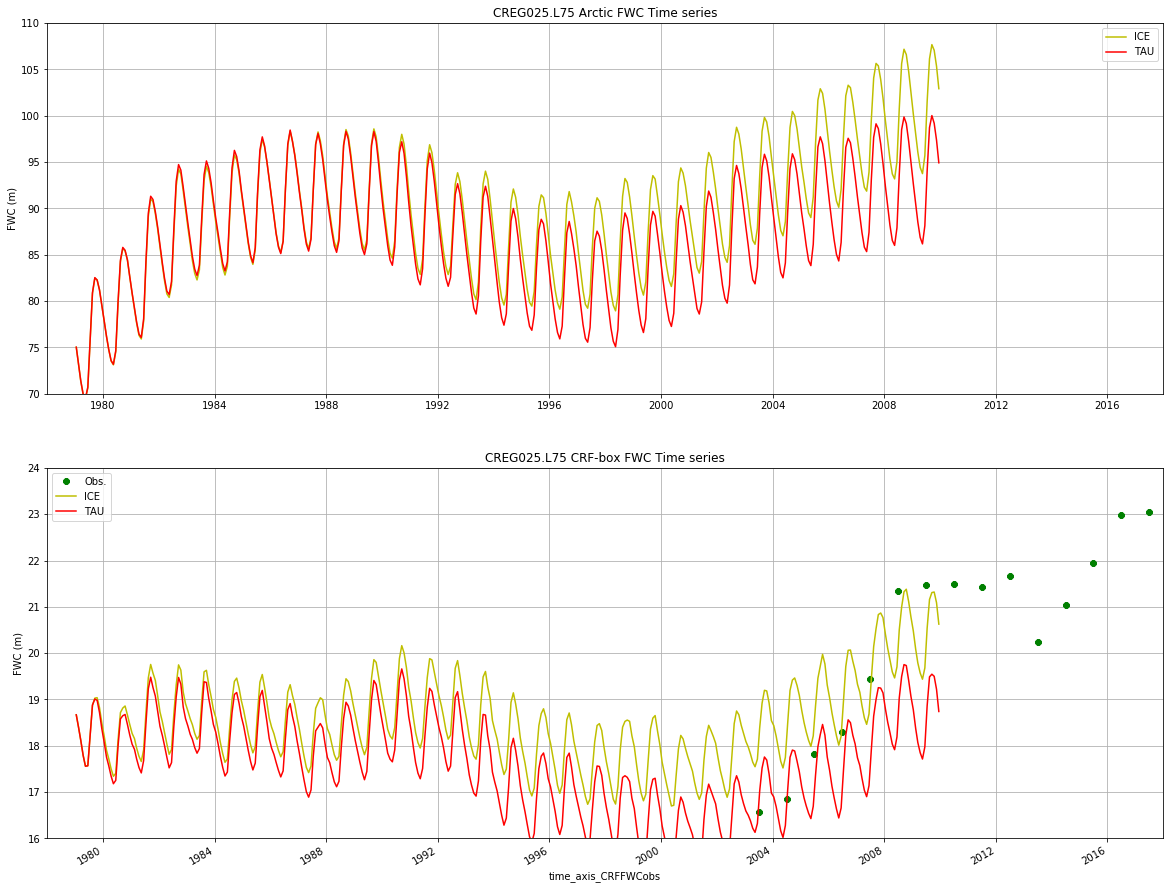

In [52]:
year_min=str(1978)
year_max=str(2018)
plt.figure(figsize=(20,15))
plt.subplot(211)
#plt.plot(Time_era01,Tise_ERA01['LongTS_BIGFWC']*1e-12,color='r',label='NEMO3.6')
#plt.plot(Time_era01LAS,Tise_ERA01LAS['LongTS_BIGFWC']*1e-12,color='y',label='NEMO4.0.5')
#plt.plot(Time_NEMO420,Tise_NEMO420['LongTS_BIGFWC']*1e-12,color='b',label='NEMO4.2.0')
#plt.plot(Time_NEMO420IRW,Tise_NEMO420IRW['LongTS_BIGFWC']*1e-12,color=cmap[3],label='IRW')
#plt.plot(Time_NEMO420PCA,Tise_NEMO420PCA['LongTS_BIGFWC']*1e-12,color=cmap[3],label='PCA')
#plt.plot(Time_NEMO420OPA,Tise_NEMO420OPA['LongTS_BIGFWC']*1e-12,color=cmap[3],label='OPA')
#plt.plot(Time_NEMO420CIO,Tise_NEMO420CIO['LongTS_BIGFWC']*1e-12,color='grey',label='CIO')
#plt.plot(Time_NEMO420DRG,Tise_NEMO420DRG['LongTS_BIGFWC']*1e-12,color='purple',label='DRG')
#plt.plot(Time_NEMO420RAT,Tise_NEMO420RAT['LongTS_BIGFWC']*1e-12,color='purple',label='RAT')
#plt.plot(Time_NEMO420PSA,Tise_NEMO420PSA['LongTS_BIGFWC']*1e-12,color='grey',label='PSA')
#plt.plot(Time_NEMO420LAN,Tise_NEMO420LAN['LongTS_BIGFWC']*1e-12,color=cmap[8],label='LAN')
#plt.plot(Time_NEMO420REY,Tise_NEMO420REY['LongTS_BIGFWC']*1e-12,color='purple',label='REY')
#plt.plot(Time_NEMO420QUA,Tise_NEMO420QUA['LongTS_BIGFWC']*1e-12,color=cmap[8],label='QUA')
#plt.plot(Time_NEMO420YES,Tise_NEMO420YES['LongTS_BIGFWC']*1e-12,color=cmap[3],label='YES')
#plt.plot(Time_NEMO420RIP,Tise_NEMO420RIP['LongTS_BIGFWC']*1e-12,color='r',label='RIP')
#plt.plot(Time_NEMO420BLP,Tise_NEMO420BLP['LongTS_BIGFWC']*1e-12,color='y',label='BLP')
#plt.plot(Time_NEMO420ASH,Tise_NEMO420ASH['LongTS_BIGFWC']*1e-12,color='r',label='ASH')
plt.plot(Time_NEMO420ICE,Tise_NEMO420ICE['LongTS_BIGFWC']*1e-12,color='y',label='ICE')
plt.plot(Time_NEMO420TAU,Tise_NEMO420TAU['LongTS_BIGFWC']*1e-12,color='r',label='TAU')

plt.xlim([year_min,year_max])
plt.ylim([70,110])
plt.title('CREG025.L75 Arctic FWC Time series')
plt.ylabel('FWC (m)')
plt.grid(True)
plt.legend()

plt.subplot(212)
(ds_OBSdataNEW['LongTS_OBS_CRFFWC']).plot(color='g',linestyle='None', marker='8', markersize=6,label='Obs.')
#plt.plot(Time_era01,Tise_ERA01['LongTS_FWC']*1e-12,color='r',label='NEMO3.6')
#plt.plot(Time_era01LAS,Tise_ERA01LAS['LongTS_FWC']*1e-12,color='y',label='NEMO4.0.5')
#plt.plot(Time_NEMO420,Tise_NEMO420['LongTS_FWC']*1e-12,color='b',label='NEMO4.2.0')
#plt.plot(Time_NEMO420IRW,Tise_NEMO420IRW['LongTS_FWC']*1e-12,color=cmap[3],label='IRW')
#plt.plot(Time_NEMO420PCA,Tise_NEMO420PCA['LongTS_FWC']*1e-12,color=cmap[3],label='PCA')
#plt.plot(Time_NEMO420OPA,Tise_NEMO420OPA['LongTS_FWC']*1e-12,color=cmap[3],label='OPA')
#plt.plot(Time_NEMO420CIO,Tise_NEMO420CIO['LongTS_FWC']*1e-12,color='grey',label='CIO')
#plt.plot(Time_NEMO420DRG,Tise_NEMO420DRG['LongTS_FWC']*1e-12,color='purple',label='DRG')
#plt.plot(Time_NEMO420RAT,Tise_NEMO420RAT['LongTS_FWC']*1e-12,color='purple',label='RAT')
#plt.plot(Time_NEMO420PSA,Tise_NEMO420PSA['LongTS_FWC']*1e-12,color='grey',label='PSA')
#plt.plot(Time_NEMO420LAN,Tise_NEMO420LAN['LongTS_FWC']*1e-12,color=cmap[8],label='LAN')
#plt.plot(Time_NEMO420REY,Tise_NEMO420REY['LongTS_FWC']*1e-12,color='purple',label='REY')
#plt.plot(Time_NEMO420QUA,Tise_NEMO420QUA['LongTS_FWC']*1e-12,color=cmap[8],label='QUA')
#plt.plot(Time_NEMO420YES,Tise_NEMO420YES['LongTS_FWC']*1e-12,color=cmap[3],label='YES')
#plt.plot(Time_NEMO420RIP,Tise_NEMO420RIP['LongTS_FWC']*1e-12,color='r',label='RIP')
#plt.plot(Time_NEMO420BLP,Tise_NEMO420BLP['LongTS_FWC']*1e-12,color='y',label='BLP')
#plt.plot(Time_NEMO420ASH,Tise_NEMO420ASH['LongTS_FWC']*1e-12,color='r',label='ASH')
plt.plot(Time_NEMO420ICE,Tise_NEMO420ICE['LongTS_FWC']*1e-12,color='y',label='ICE')
plt.plot(Time_NEMO420TAU,Tise_NEMO420TAU['LongTS_FWC']*1e-12,color='r',label='TAU')

plt.title('CREG025.L75 CRF-box FWC Time series')
plt.ylabel('FWC (m)')
plt.xlim([year_min,year_max])
plt.ylim([16,24])
plt.grid(True)
plt.legend()

>> # EKMAN PUMPING Time-series 

In [53]:
DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/"
filein="CREG025.L75-NEMO420/CREG025.L75-NEMO420_ICEFWCWEK-LGTS_y1979LASTy.nc"

Tise_NEMO420=xr.open_dataset(DATAP+filein)
Time_NEMO420=pd.date_range(start='1979-01',end='2015-12',freq='MS')+ pd.DateOffset(days=14)

DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/"
filein="CREG025.L75-ERA01NEM405LAS/CREG025.L75-ERA01NEM405LAS_ICEFWCWEK-LGTS_y1979LASTy.nc"

Tise_era01LAS=xr.open_dataset(DATAP+filein)
Time_era01LAS=pd.date_range(start='1979-01',end='2009-12',freq='MS')+ pd.DateOffset(days=14)

DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-ERA01-MEAN/MONITOR/NCDF-CREG025.L75/"
filein="CREG025.L75-ERA01_ICEFWCWEK-LGTS_y1979LASTy.nc"

Tise_era01=xr.open_dataset(DATAP+filein)
Time_era01=pd.date_range(start='1979-01',end='2015-12',freq='MS')+ pd.DateOffset(days=14)

#DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420IRW/"
#filein="CREG025.L75-NEMO420IRW_ICEFWCWEK-LGTS_y1979LASTy.nc"
#Tise_NEMO420IRW=xr.open_dataset(DATAP+filein)
#Time_NEMO420IRW=pd.date_range(start='1979-01',end='2000-12',freq='MS')+ pd.DateOffset(days=14)

#DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420PCA/"
#filein="CREG025.L75-NEMO420PCA_ICEFWCWEK-LGTS_y1979LASTy.nc"
#Tise_NEMO420PCA=xr.open_dataset(DATAP+filein)
#Time_NEMO420PCA=pd.date_range(start='1979-01',end='2009-12',freq='MS')+ pd.DateOffset(days=14)

DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420OPA/"
filein="CREG025.L75-NEMO420OPA_ICEFWCWEK-LGTS_y1979LASTy.nc"
Tise_NEMO420OPA=xr.open_dataset(DATAP+filein)
Time_NEMO420OPA=pd.date_range(start='1979-01',end='2009-12',freq='MS')+ pd.DateOffset(days=14)

DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420CIO/"
filein="CREG025.L75-NEMO420CIO_ICEFWCWEK-LGTS_y1979LASTy.nc"
Tise_NEMO420CIO=xr.open_dataset(DATAP+filein)
Time_NEMO420CIO=pd.date_range(start='1979-01',end='2009-12',freq='MS')+ pd.DateOffset(days=14)

#DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420DRG/"
#filein="CREG025.L75-NEMO420DRG_ICEFWCWEK-LGTS_y1979LASTy.nc"
#Tise_NEMO420DRG=xr.open_dataset(DATAP+filein)
#Time_NEMO420DRG=pd.date_range(start='1979-01',end='2000-12',freq='MS')+ pd.DateOffset(days=14)

DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420RAT/"
filein="CREG025.L75-NEMO420RAT_ICEFWCWEK-LGTS_y1979LASTy.nc"
Tise_NEMO420RAT=xr.open_dataset(DATAP+filein)
Time_NEMO420RAT=pd.date_range(start='1979-01',end='2009-12',freq='MS')+ pd.DateOffset(days=14)

DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420PSA/"
filein="CREG025.L75-NEMO420PSA_ICEFWCWEK-LGTS_y1979LASTy.nc"
Tise_NEMO420PSA=xr.open_dataset(DATAP+filein)
Time_NEMO420PSA=pd.date_range(start='1979-01',end='2009-12',freq='MS')+ pd.DateOffset(days=14)

DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420LAN/"
filein="CREG025.L75-NEMO420LAN_ICEFWCWEK-LGTS_y1979LASTy.nc"
Tise_NEMO420LAN=xr.open_dataset(DATAP+filein)
Time_NEMO420LAN=pd.date_range(start='1979-01',end='2009-12',freq='MS')+ pd.DateOffset(days=14)

DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420QUA/"
filein="CREG025.L75-NEMO420QUA_ICEFWCWEK-LGTS_y1979LASTy.nc"
Tise_NEMO420QUA=xr.open_dataset(DATAP+filein)
Time_NEMO420QUA=pd.date_range(start='1979-01',end='2015-12',freq='MS')+ pd.DateOffset(days=14)

DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420REY/"
filein="CREG025.L75-NEMO420REY_ICEFWCWEK-LGTS_y1979LASTy.nc"
Tise_NEMO420REY=xr.open_dataset(DATAP+filein)
Time_NEMO420REY=pd.date_range(start='1979-01',end='2009-12',freq='MS')+ pd.DateOffset(days=14)

DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420YES/"
filein="CREG025.L75-NEMO420YES_ICEFWCWEK-LGTS_y1979LASTy.nc"
Tise_NEMO420YES=xr.open_dataset(DATAP+filein)
Time_NEMO420YES=pd.date_range(start='1979-01',end='2009-12',freq='MS')+ pd.DateOffset(days=14)

DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420RIP/"
filein="CREG025.L75-NEMO420RIP_ICEFWCWEK-LGTS_y1979LASTy.nc"
Tise_NEMO420RIP=xr.open_dataset(DATAP+filein)
Time_NEMO420RIP=pd.date_range(start='1979-01',end='2009-12',freq='MS')+ pd.DateOffset(days=14)

DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420COO/"
filein="CREG025.L75-NEMO420COO_ICEFWCWEK-LGTS_y1979LASTy.nc"
Tise_NEMO420COO=xr.open_dataset(DATAP+filein)
Time_NEMO420COO=pd.date_range(start='1979-01',end='1996-12',freq='MS')+ pd.DateOffset(days=14)

DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/CREG025.L75-NEMO420BLP/"
filein="CREG025.L75-NEMO420BLP_ICEFWCWEK-LGTS_y1979LASTy.nc"
Tise_NEMO420BLP=xr.open_dataset(DATAP+filein)
Time_NEMO420BLP=pd.date_range(start='1979-01',end='2009-12',freq='MS')+ pd.DateOffset(days=14)


ds_out=xr.Dataset()
ds_out['Tise_NEMO420']=(('Time_NEMO420'),Tise_NEMO420['LongTS_WEkm'])
ds_out['Time_NEMO420']=Time_NEMO420

ds_out['Tise_era01LAS']=(('Time_era01LAS'),Tise_era01LAS['LongTS_WEkm'])
ds_out['Time_era01LAS']=pd.date_range(start='1979-01',end='2009-12',freq='MS')+ pd.DateOffset(days=14)

ds_out['Tise_era01']=(('Time_era01'),Tise_era01['LongTS_WEkm'])
ds_out['Time_era01']=Time_era01

#ds_out['Tise_NEMO420IRW']=(('Time_NEMO420IRW'),Tise_NEMO420IRW['LongTS_WEkm'])
#ds_out['Time_NEMO420IRW']=Time_NEMO420IRW

#ds_out['Tise_NEMO420PCA']=(('Time_NEMO420PCA'),Tise_NEMO420PCA['LongTS_WEkm'])
#ds_out['Time_NEMO420PCA']=Time_NEMO420PCA

#ds_out['Tise_NEMO420OPA']=(('Time_NEMO420OPA'),Tise_NEMO420OPA['LongTS_WEkm'])
#ds_out['Time_NEMO420OPA']=Time_NEMO420OPA

ds_out['Tise_NEMO420CIO']=(('Time_NEMO420CIO'),Tise_NEMO420CIO['LongTS_WEkm'])
ds_out['Time_NEMO420CIO']=Time_NEMO420CIO

#ds_out['Tise_NEMO420DRG']=(('Time_NEMO420DRG'),Tise_NEMO420DRG['LongTS_WEkm'])
#ds_out['Time_NEMO420DRG']=Time_NEMO420DRG

ds_out['Tise_NEMO420RAT']=(('Time_NEMO420RAT'),Tise_NEMO420RAT['LongTS_WEkm'])
ds_out['Time_NEMO420RAT']=Time_NEMO420RAT

ds_out['Tise_NEMO420PSA']=(('Time_NEMO420PSA'),Tise_NEMO420PSA['LongTS_WEkm'])
ds_out['Time_NEMO420PSA']=Time_NEMO420PSA

ds_out['Tise_NEMO420LAN']=(('Time_NEMO420LAN'),Tise_NEMO420LAN['LongTS_WEkm'])
ds_out['Time_NEMO420LAN']=Time_NEMO420LAN

ds_out['Tise_NEMO420REY']=(('Time_NEMO420REY'),Tise_NEMO420REY['LongTS_WEkm'])
ds_out['Time_NEMO420REY']=Time_NEMO420REY

ds_out['Tise_NEMO420QUA']=(('Time_NEMO420QUA'),Tise_NEMO420QUA['LongTS_WEkm'])
ds_out['Time_NEMO420QUA']=Time_NEMO420QUA

ds_out['Tise_NEMO420YES']=(('Time_NEMO420YES'),Tise_NEMO420YES['LongTS_WEkm'])
ds_out['Time_NEMO420YES']=Time_NEMO420YES

ds_out['Tise_NEMO420RIP']=(('Time_NEMO420RIP'),Tise_NEMO420RIP['LongTS_WEkm'])
ds_out['Time_NEMO420RIP']=Time_NEMO420RIP

#ds_out['Tise_NEMO420COO']=(('Time_NEMO420COO'),Tise_NEMO420COO['LongTS_WEkm'])
#ds_out['Time_NEMO420COO']=Time_NEMO420COO

ds_out['Tise_NEMO420BLP']=(('Time_NEMO420BLP'),Tise_NEMO420BLP['LongTS_WEkm'])
ds_out['Time_NEMO420BLP']=Time_NEMO420BLP

ds_out['Tise_NEMO420ASH']=(('Time_NEMO420ASH'),Tise_NEMO420ASH['LongTS_WEkm'])
ds_out['Time_NEMO420ASH']=Time_NEMO420ASH

ds_out['Tise_NEMO420ICE']=(('Time_NEMO420ICE'),Tise_NEMO420ICE['LongTS_WEkm'])
ds_out['Time_NEMO420ICE']=Time_NEMO420ICE

ds_out['Tise_NEMO420TAU']=(('Time_NEMO420TAU'),Tise_NEMO420TAU['LongTS_WEkm'])
ds_out['Time_NEMO420TAU']=Time_NEMO420TAU


In [54]:
DATAOBS='/home/datawork-lops-drakkarcom/DATA-REFERENCE/FOR-MONITORING/OCEAN/'
dataobsfile='ArcticEkmanPumping_MonthlyMean.nc'
ds_obsEkm=xr.open_dataset(DATAOBS+dataobsfile)

In [55]:
# Resample to get an annual mean  
###ds_outYear=ds_out.resample(time='1Y').mean(dim='time')
# Or perfrom a 12 months rolling mean
###ds_outYearRoll=ds_out.rolling(time=12,center=True).mean()

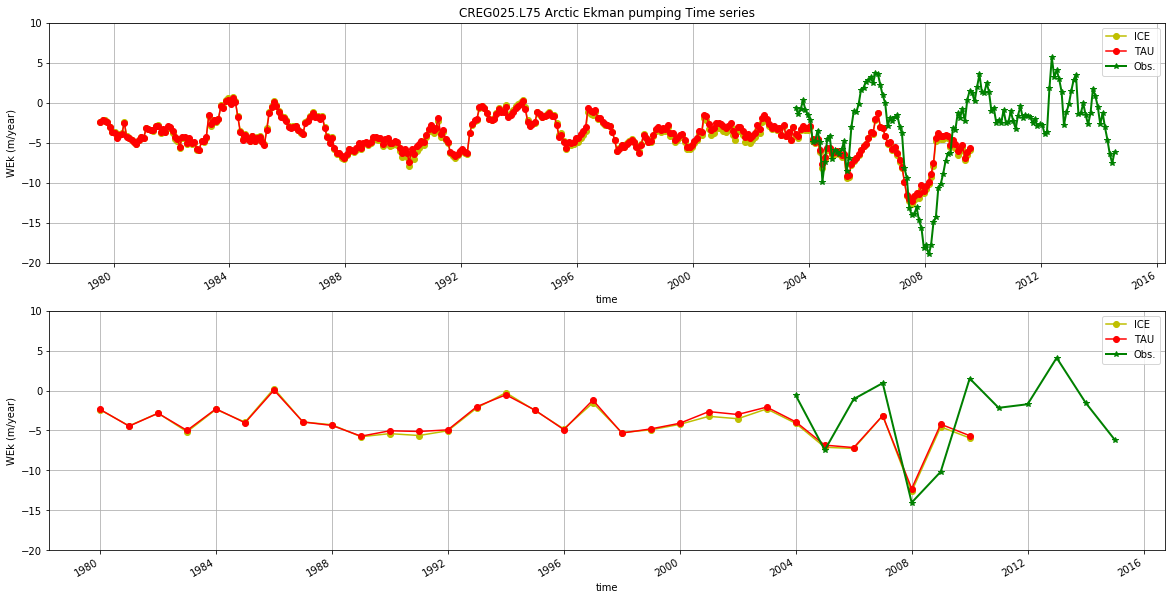

In [56]:

year_min=str(1978)
year_max=str(2018)
plt.figure(figsize=(20,15))
plt.subplot(311)

#ds_out['Tise_era01'].rolling(Time_era01=12,center=True).mean().plot(marker='o',label='NEMO3.6',color='r')
#ds_out['Tise_era01LAS'].rolling(Time_era01LAS=12,center=True).mean().plot(marker='o',label='NEMO4.0.5',color='y')
#ds_out['Tise_NEMO420'].rolling(Time_NEMO420=12,center=True).mean().plot(marker='o',label='NEMO4.2.0',color='b')
#ds_out['Tise_NEMO420IRW'].rolling(Time_NEMO420IRW=12,center=True).mean().plot(marker='o',label='IRW',color=cmap[3])
#ds_out['Tise_NEMO420PCA'].rolling(Time_NEMO420PCA=12,center=True).mean().plot(marker='o',label='PCA',color=cmap[3])
#ds_out['Tise_NEMO420OPA'].rolling(Time_NEMO420OPA=12,center=True).mean().plot(marker='o',label='OPA',color=cmap[3])
#ds_out['Tise_NEMO420CIO'].rolling(Time_NEMO420CIO=12,center=True).mean().plot(marker='o',label='CIO',color='grey')
#ds_out['Tise_NEMO420DRG'].rolling(Time_NEMO420DRG=12,center=True).mean().plot(marker='o',label='DRG',color='purple')
#ds_out['Tise_NEMO420RAT'].rolling(Time_NEMO420RAT=12,center=True).mean().plot(marker='o',label='RAT',color='purple')
#ds_out['Tise_NEMO420PSA'].rolling(Time_NEMO420PSA=12,center=True).mean().plot(marker='o',label='PSA',color='grey')
#ds_out['Tise_NEMO420LAN'].rolling(Time_NEMO420LAN=12,center=True).mean().plot(marker='o',label='LAN',color=cmap[8])
#ds_out['Tise_NEMO420REY'].rolling(Time_NEMO420REY=12,center=True).mean().plot(marker='o',label='REY',color='purple')
#ds_out['Tise_NEMO420QUA'].rolling(Time_NEMO420QUA=12,center=True).mean().plot(marker='o',label='QUA',color=cmap[8])
#ds_out['Tise_NEMO420YES'].rolling(Time_NEMO420YES=12,center=True).mean().plot(marker='o',label='YES',color=cmap[3])
#ds_out['Tise_NEMO420RIP'].rolling(Time_NEMO420RIP=12,center=True).mean().plot(marker='o',label='RIP',color='r')
#ds_out['Tise_NEMO420BLP'].rolling(Time_NEMO420BLP=12,center=True).mean().plot(marker='o',label='BLP',color='y')
#ds_out['Tise_NEMO420ASH'].rolling(Time_NEMO420ASH=12,center=True).mean().plot(marker='o',label='ASH',color='r')
ds_out['Tise_NEMO420ICE'].rolling(Time_NEMO420ICE=12,center=True).mean().plot(marker='o',label='ICE',color='y')
ds_out['Tise_NEMO420TAU'].rolling(Time_NEMO420TAU=12,center=True).mean().plot(marker='o',label='TAU',color='r')

ds_obsEkm['weMooringMonth'].rolling(time=12,center=True).mean().plot(marker='*',color='g',linewidth=2,label='Obs.')

plt.ylim([-20,10])
plt.title('CREG025.L75 Arctic Ekman pumping Time series')
plt.ylabel('WEk (m/year)')
plt.grid(True)
plt.legend()

plt.subplot(312)
#ds_out['Tise_era01'].resample(Time_era01='1Y').mean().plot(marker='o',label='NEMO3.6',color='r')
#ds_out['Tise_era01LAS'].resample(Time_era01LAS='1Y').mean().plot(marker='o',label='NEMO4.0.5',color='y')
#ds_out['Tise_NEMO420'].resample(Time_NEMO420='1Y').mean().plot(marker='o',label='NEMO4.2.0',color='b')
#ds_out['Tise_NEMO420IRW'].resample(Time_NEMO420IRW='1Y').mean().plot(marker='o',label='IRW',color=cmap[3])
#ds_out['Tise_NEMO420PCA'].resample(Time_NEMO420PCA='1Y').mean().plot(marker='o',label='PCA',color=cmap[3])
#ds_out['Tise_NEMO420OPA'].resample(Time_NEMO420OPA='1Y').mean().plot(marker='o',label='OPA',color=cmap[3])
#ds_out['Tise_NEMO420CIO'].resample(Time_NEMO420CIO='1Y').mean().plot(marker='o',label='CIO',color='grey')
#ds_out['Tise_NEMO420DRG'].resample(Time_NEMO420DRG='1Y').mean().plot(marker='o',label='DRG',color='purple')
#ds_out['Tise_NEMO420RAT'].resample(Time_NEMO420RAT='1Y').mean().plot(marker='o',label='RAT',color='purple')
#ds_out['Tise_NEMO420PSA'].resample(Time_NEMO420PSA='1Y').mean().plot(marker='o',label='PSA',color='grey')
#ds_out['Tise_NEMO420LAN'].resample(Time_NEMO420LAN='1Y').mean().plot(marker='o',label='LAN',color=cmap[8])
#ds_out['Tise_NEMO420REY'].resample(Time_NEMO420REY='1Y').mean().plot(marker='o',label='REY',color='purple')
#ds_out['Tise_NEMO420QUA'].resample(Time_NEMO420QUA='1Y').mean().plot(marker='o',label='QUA',color=cmap[8])
#ds_out['Tise_NEMO420YES'].resample(Time_NEMO420YES='1Y').mean().plot(marker='o',label='YES',color=cmap[3])
#ds_out['Tise_NEMO420RIP'].resample(Time_NEMO420RIP='1Y').mean().plot(marker='o',label='RIP',color='r')
#ds_out['Tise_NEMO420BLP'].resample(Time_NEMO420BLP='1Y').mean().plot(marker='o',label='BLP',color='y')
#ds_out['Tise_NEMO420ASH'].resample(Time_NEMO420ASH='1Y').mean().plot(marker='o',label='ASH',color='r')
ds_out['Tise_NEMO420ICE'].resample(Time_NEMO420ICE='1Y').mean().plot(marker='o',label='ICE',color='y')
ds_out['Tise_NEMO420TAU'].resample(Time_NEMO420TAU='1Y').mean().plot(marker='o',label='TAU',color='r')

ds_obsEkm['weMooringMonth'].resample(time='1Y').mean().plot(marker='*',color='g',linewidth=2,label='Obs.')

plt.ylim([-20,10])
plt.ylabel('WEk (m/year)')
plt.grid(True)
plt.legend()



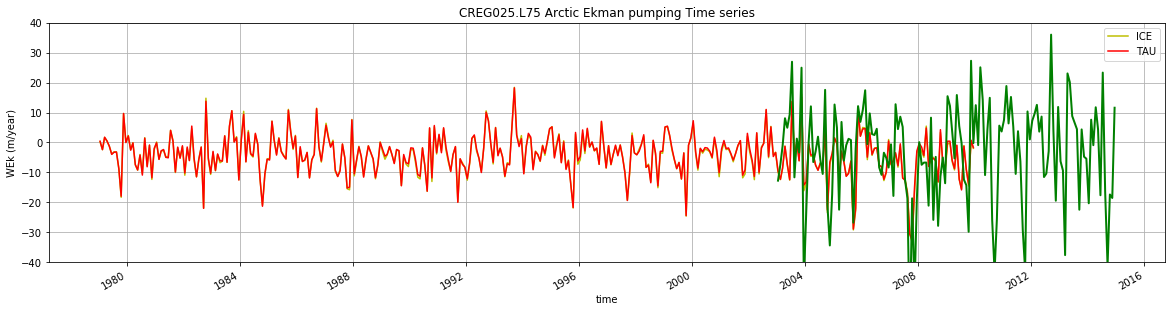

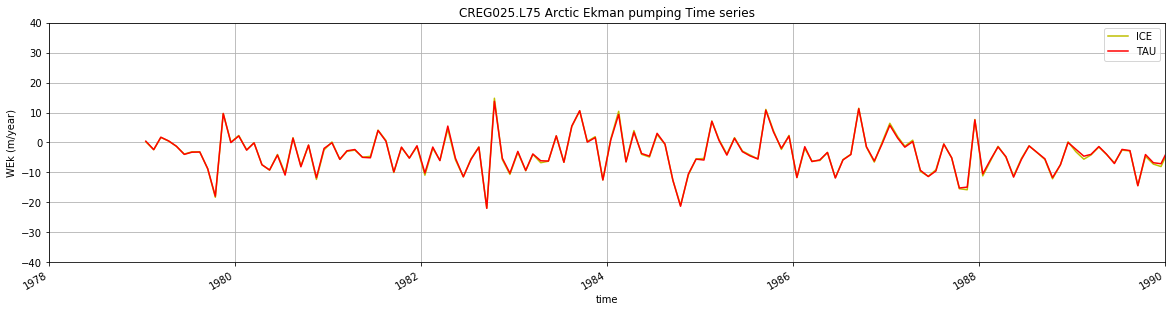

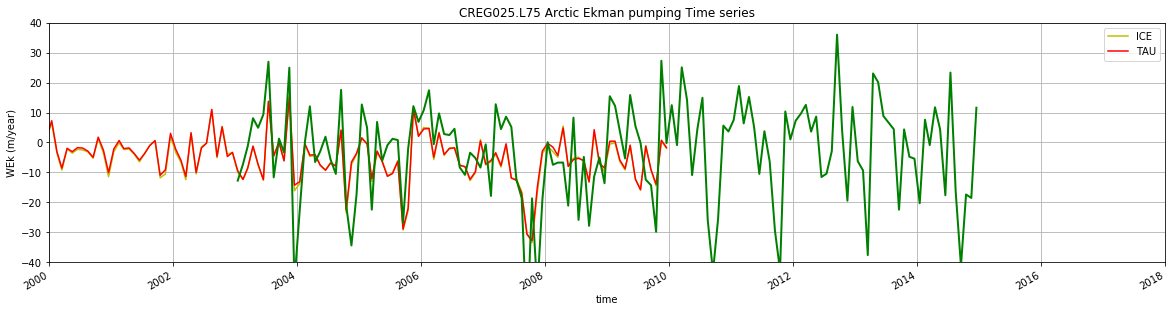

In [57]:
year_min=1978
year_max=2018
plt.figure(figsize=(20,15))
plt.subplot(311)
#plt.plot(Time_era01,Tise_era01['LongTS_WEkm'],color='r',label='NEMO3.6')
#plt.plot(Time_era01LAS,Tise_era01LAS['LongTS_WEkm'],color='y',label='NEMO4.0.5')
#plt.plot(Time_NEMO420,Tise_NEMO420['LongTS_WEkm'],color='b',label='NEMO4.2.0')
#plt.plot(Time_NEMO420IRW,Tise_NEMO420IRW['LongTS_WEkm'],color=cmap[3],label='IRW')
#plt.plot(Time_NEMO420PCA,Tise_NEMO420PCA['LongTS_WEkm'],color=cmap[3],label='PCA')
#plt.plot(Time_NEMO420OPA,Tise_NEMO420OPA['LongTS_WEkm'],color=cmap[3],label='OPA')
#plt.plot(Time_NEMO420CIO,Tise_NEMO420CIO['LongTS_WEkm'],color='grey',label='CIO')
#plt.plot(Time_NEMO420DRG,Tise_NEMO420DRG['LongTS_WEkm'],color='purple',label='DRG')
#plt.plot(Time_NEMO420RAT,Tise_NEMO420RAT['LongTS_WEkm'],color='purple',label='RAT')
#plt.plot(Time_NEMO420PSA,Tise_NEMO420PSA['LongTS_WEkm'],color='grey',label='PSA')
#plt.plot(Time_NEMO420LAN,Tise_NEMO420LAN['LongTS_WEkm'],color=cmap[8],label='LAN')
#plt.plot(Time_NEMO420REY,Tise_NEMO420REY['LongTS_WEkm'],color='purple',label='REY')
#plt.plot(Time_NEMO420QUA,Tise_NEMO420QUA['LongTS_WEkm'],color=cmap[8],label='QUA')
#plt.plot(Time_NEMO420YES,Tise_NEMO420YES['LongTS_WEkm'],color=cmap[3],label='YES')
#plt.plot(Time_NEMO420RIP,Tise_NEMO420RIP['LongTS_WEkm'],color='r',label='RIP')
#plt.plot(Time_NEMO420BLP,Tise_NEMO420BLP['LongTS_WEkm'],color='y',label='BLP')
#plt.plot(Time_NEMO420ASH,Tise_NEMO420ASH['LongTS_WEkm'],color='r',label='ASH')
plt.plot(Time_NEMO420ICE,Tise_NEMO420ICE['LongTS_WEkm'],color='y',label='ICE')
plt.plot(Time_NEMO420TAU,Tise_NEMO420TAU['LongTS_WEkm'],color='r',label='TAU')

ds_obsEkm.weMooringMonth.plot(color='g',linewidth=2)
#plt.xlim([year_min,year_max])
plt.ylim([-40,40])
plt.title('CREG025.L75 Arctic Ekman pumping Time series')
plt.ylabel('WEk (m/year)')
plt.grid(True)
plt.legend()


year_min=1978
year_max=1990
plt.figure(figsize=(20,15))
plt.subplot(312)
#plt.plot(Time_era01,Tise_era01['LongTS_WEkm'],color='r',label='NEMO3.6')
#plt.plot(Time_era01LAS,Tise_era01LAS['LongTS_WEkm'],color='y',label='NEMO4.0.5')
#plt.plot(Time_NEMO420,Tise_NEMO420['LongTS_WEkm'],color='b',label='NEMO4.2.0')
#plt.plot(Time_NEMO420IRW,Tise_NEMO420IRW['LongTS_WEkm'],color=cmap[3],label='IRW')
#plt.plot(Time_NEMO420PCA,Tise_NEMO420PCA['LongTS_WEkm'],color=cmap[3],label='PCA')
#plt.plot(Time_NEMO420OPA,Tise_NEMO420OPA['LongTS_WEkm'],color=cmap[3],label='OPA')
#plt.plot(Time_NEMO420CIO,Tise_NEMO420CIO['LongTS_WEkm'],color='grey',label='CIO')
#plt.plot(Time_NEMO420DRG,Tise_NEMO420DRG['LongTS_WEkm'],color='purple',label='DRG')
#plt.plot(Time_NEMO420RAT,Tise_NEMO420RAT['LongTS_WEkm'],color='purple',label='RAT')
#plt.plot(Time_NEMO420PSA,Tise_NEMO420PSA['LongTS_WEkm'],color='grey',label='PSA')
#plt.plot(Time_NEMO420LAN,Tise_NEMO420LAN['LongTS_WEkm'],color=cmap[8],label='LAN')
#plt.plot(Time_NEMO420REY,Tise_NEMO420REY['LongTS_WEkm'],color='purple',label='REY')
#plt.plot(Time_NEMO420QUA,Tise_NEMO420QUA['LongTS_WEkm'],color=cmap[8],label='QUA')
#plt.plot(Time_NEMO420YES,Tise_NEMO420YES['LongTS_WEkm'],color=cmap[3],label='YES')
#plt.plot(Time_NEMO420RIP,Tise_NEMO420RIP['LongTS_WEkm'],color='r',label='RIP')
#plt.plot(Time_NEMO420BLP,Tise_NEMO420BLP['LongTS_WEkm'],color='y',label='BLP')
#plt.plot(Time_NEMO420ASH,Tise_NEMO420ASH['LongTS_WEkm'],color='r',label='ASH')
plt.plot(Time_NEMO420ICE,Tise_NEMO420ICE['LongTS_WEkm'],color='y',label='ICE')
plt.plot(Time_NEMO420TAU,Tise_NEMO420TAU['LongTS_WEkm'],color='r',label='TAU')

ds_obsEkm.weMooringMonth.plot(color='g',linewidth=2)
plt.xlim([str(year_min),str(year_max)])
plt.ylim([-40,40])
plt.title('CREG025.L75 Arctic Ekman pumping Time series')
plt.ylabel('WEk (m/year)')
plt.grid(True)
plt.legend()


year_min=2000
year_max=2018
plt.figure(figsize=(20,15))
plt.subplot(313)
#plt.plot(Time_era01,Tise_era01['LongTS_WEkm'],color='r',label='NEMO3.6')
#plt.plot(Time_era01LAS,Tise_era01LAS['LongTS_WEkm'],color='y',label='NEMO4.0.5')
#plt.plot(Time_NEMO420,Tise_NEMO420['LongTS_WEkm'],color='b',label='NEMO4.2.0')
#plt.plot(Time_NEMO420IRW,Tise_NEMO420IRW['LongTS_WEkm'],color=cmap[3],label='IRW')
#plt.plot(Time_NEMO420PCA,Tise_NEMO420PCA['LongTS_WEkm'],color=cmap[3],label='PCA')
#plt.plot(Time_NEMO420OPA,Tise_NEMO420OPA['LongTS_WEkm'],color=cmap[3],label='OPA')
#plt.plot(Time_NEMO420CIO,Tise_NEMO420CIO['LongTS_WEkm'],color='grey',label='CIO')
#plt.plot(Time_NEMO420DRG,Tise_NEMO420DRG['LongTS_WEkm'],color='grey',label='DRG')
#plt.plot(Time_NEMO420RAT,Tise_NEMO420RAT['LongTS_WEkm'],color='grey',label='RAT')
#plt.plot(Time_NEMO420PSA,Tise_NEMO420PSA['LongTS_WEkm'],color='grey',label='PSA')
#plt.plot(Time_NEMO420LAN,Tise_NEMO420LAN['LongTS_WEkm'],color=cmap[8],label='LAN')
#plt.plot(Time_NEMO420REY,Tise_NEMO420REY['LongTS_WEkm'],color='purple',label='REY')
#plt.plot(Time_NEMO420QUA,Tise_NEMO420QUA['LongTS_WEkm'],color=cmap[8],label='QUA')
#plt.plot(Time_NEMO420YES,Tise_NEMO420YES['LongTS_WEkm'],color=cmap[3],label='YES')
#plt.plot(Time_NEMO420RIP,Tise_NEMO420RIP['LongTS_WEkm'],color='r',label='RIP')
#plt.plot(Time_NEMO420BLP,Tise_NEMO420BLP['LongTS_WEkm'],color='y',label='BLP')
#plt.plot(Time_NEMO420ASH,Tise_NEMO420ASH['LongTS_WEkm'],color='r',label='ASH')
plt.plot(Time_NEMO420ICE,Tise_NEMO420ICE['LongTS_WEkm'],color='y',label='ICE')
plt.plot(Time_NEMO420TAU,Tise_NEMO420TAU['LongTS_WEkm'],color='r',label='TAU')

ds_obsEkm.weMooringMonth.plot(color='g',linewidth=2)
plt.xlim([str(year_min),str(year_max)])
plt.ylim([-40,40])
plt.title('CREG025.L75 Arctic Ekman pumping Time series')
plt.ylabel('WEk (m/year)')
plt.grid(True)
plt.legend()


>> # ICE SALT & MASS FLUX Time-series 

In [58]:
DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-ERA01-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/"
filein="CREG025.L75-ERA01/CREG025.L75-ERA01_ICEFWCWEK-LGTS_y1979LASTy.nc"
Tise_era01=xr.open_dataset(DATAP+filein)
Time_era01=pd.date_range(start='1979-01',end='2015-12',freq='MS')+ pd.DateOffset(days=14)

DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-ERA01-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/"
filein="CREG025.L75-ERA01NEM405LAS/CREG025.L75-ERA01NEM405LAS_ICEFWCWEK-LGTS_y1979LASTy.nc"
Tise_era01LAS=xr.open_dataset(DATAP+filein)
Time_era01LAS=pd.date_range(start='1979-01',end='2009-12',freq='MS')+ pd.DateOffset(days=14)


DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/"
filein="CREG025.L75-NEMO420/CREG025.L75-NEMO420_ICEFWCWEK-LGTS_y1979LASTy.nc"
Tise_NEMO420=xr.open_dataset(DATAP+filein)
Time_NEMO420=pd.date_range(start='1979-01',end='2015-12',freq='MS')+ pd.DateOffset(days=14)

#DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/"
#filein="CREG025.L75-NEMO420PCA/CREG025.L75-NEMO420PCA_ICEFWCWEK-LGTS_y1979LASTy.nc"
#Tise_NEMO420PCA=xr.open_dataset(DATAP+filein)
#Time_NEMO420PCA=pd.date_range(start='1979-01',end='2009-12',freq="MS")+pd.DateOffset(days=14)

#DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/"
#filein="CREG025.L75-NEMO420OPA/CREG025.L75-NEMO420OPA_ICEFWCWEK-LGTS_y1979LASTy.nc"
#Tise_NEMO420OPA=xr.open_dataset(DATAP+filein)
#Time_NEMO420OPA=pd.date_range(start='1979-01',end='2009-12',freq="MS")+pd.DateOffset(days=14)

#DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/"
#filein="CREG025.L75-NEMO420CIO/CREG025.L75-NEMO420CIO_ICEFWCWEK-LGTS_y1979LASTy.nc"
#Tise_NEMO420CIO=xr.open_dataset(DATAP+filein)
#Time_NEMO420CIO=pd.date_range(start='1979-01',end='2009-12',freq="MS")+pd.DateOffset(days=14)

#DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/"
#filein="CREG025.L75-NEMO420DRG/CREG025.L75-NEMO420DRG_ICEFWCWEK-LGTS_y1979LASTy.nc"
#Tise_NEMO420DRG=xr.open_dataset(DATAP+filein)
#Time_NEMO420DRG=pd.date_range(start='1979-01',end='2000-12',freq="MS")+pd.DateOffset(days=14)

#DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420-MEAN/MONARC/INTQUANT/NCDF-CREG025.L75/"
#filein="CREG025.L75-NEMO420RAT/CREG025.L75-NEMO420RAT_ICEFWCWEK-LGTS_y1979LASTy.nc"
#Tise_NEMO420RAT=xr.open_dataset(DATAP+filein)
#Time_NEMO420RAT=pd.date_range(start='1979-01',end='2009-12',freq="MS")+pd.DateOffset(days=14)

ds_out=xr.Dataset()
ds_out['Tise_era01_SFX']=(('Time_era01'),Tise_era01['LongTS_SFX'])
ds_out['Tise_era01_VFX']=(('Time_era01'),Tise_era01['LongTS_VFX'])
ds_out['Time_era01']=Time_era01

ds_out['Tise_era01LAS_SFX']=(('Time_era01LAS'),Tise_era01LAS['LongTS_SFX'])
ds_out['Tise_era01LAS_VFX']=(('Time_era01LAS'),Tise_era01LAS['LongTS_VFX'])
ds_out['Time_era01LAS']=Time_era01LAS

ds_out['Tise_NEMO420_SFX']=(('Time_NEMO420'),Tise_NEMO420['LongTS_SFX'])
ds_out['Tise_NEMO420_VFX']=(('Time_NEMO420'),Tise_NEMO420['LongTS_VFX'])
ds_out['Time_NEMO420']=Time_NEMO420

#ds_out['Tise_NEMO420PCA_SFX']=(('Time_NEMO420PCA'),-1.*Tise_NEMO420PCA['LongTS_SFX'])
#ds_out['Tise_NEMO420PCA_VFX']=(('Time_NEMO420PCA'),-1.*Tise_NEMO420PCA['LongTS_VFX'])
#ds_out['Time_NEMO420PCA']=Time_NEMO420PCA

#ds_out['Tise_NEMO420OPA_SFX']=(('Time_NEMO420OPA'),-1.*Tise_NEMO420OPA['LongTS_SFX'])
#ds_out['Tise_NEMO420OPA_VFX']=(('Time_NEMO420OPA'),-1.*Tise_NEMO420OPA['LongTS_VFX'])
#ds_out['Time_NEMO420OPA']=Time_NEMO420OPA

#ds_out['Tise_NEMO420CIO_SFX']=(('Time_NEMO420CIO'),-1.*Tise_NEMO420CIO['LongTS_SFX'])
#ds_out['Tise_NEMO420CIO_VFX']=(('Time_NEMO420CIO'),-1.*Tise_NEMO420CIO['LongTS_VFX'])
#ds_out['Time_NEMO420CIO']=Time_NEMO420CIO

#ds_out['Tise_NEMO420DRG_SFX']=(('Time_NEMO420DRG'),-1.*Tise_NEMO420DRG['LongTS_SFX'])
#ds_out['Tise_NEMO420DRG_VFX']=(('Time_NEMO420DRG'),-1.*Tise_NEMO420DRG['LongTS_VFX'])
#ds_out['Time_NEMO420DRG']=Time_NEMO420DRG

ds_out['Tise_NEMO420RAT_SFX']=(('Time_NEMO420RAT'),-1.*Tise_NEMO420RAT['LongTS_SFX'])
ds_out['Tise_NEMO420RAT_VFX']=(('Time_NEMO420RAT'),-1.*Tise_NEMO420RAT['LongTS_VFX'])
ds_out['Time_NEMO420RAT']=Time_NEMO420RAT

ds_out['Tise_NEMO420PSA_SFX']=(('Time_NEMO420PSA'),-1.*Tise_NEMO420PSA['LongTS_SFX'])
ds_out['Tise_NEMO420PSA_VFX']=(('Time_NEMO420PSA'),-1.*Tise_NEMO420PSA['LongTS_VFX'])
ds_out['Time_NEMO420PSA']=Time_NEMO420PSA

ds_out['Tise_NEMO420LAN_SFX']=(('Time_NEMO420LAN'),-1.*Tise_NEMO420LAN['LongTS_SFX'])
ds_out['Tise_NEMO420LAN_VFX']=(('Time_NEMO420LAN'),-1.*Tise_NEMO420LAN['LongTS_VFX'])
ds_out['Time_NEMO420LAN']=Time_NEMO420LAN

ds_out['Tise_NEMO420REY_SFX']=(('Time_NEMO420REY'),-1.*Tise_NEMO420REY['LongTS_SFX'])
ds_out['Tise_NEMO420REY_VFX']=(('Time_NEMO420REY'),-1.*Tise_NEMO420REY['LongTS_VFX'])
ds_out['Time_NEMO420REY']=Time_NEMO420REY

ds_out['Tise_NEMO420YES_SFX']=(('Time_NEMO420YES'),-1.*Tise_NEMO420YES['LongTS_SFX'])
ds_out['Tise_NEMO420YES_VFX']=(('Time_NEMO420YES'),-1.*Tise_NEMO420YES['LongTS_VFX'])
ds_out['Time_NEMO420YES']=Time_NEMO420YES

#ds_out['Tise_NEMO420QUA_SFX']=(('Time_NEMO420QUA'),-1.*Tise_NEMO420QUA['LongTS_SFX'])
#ds_out['Tise_NEMO420QUA_VFX']=(('Time_NEMO420QUA'),-1.*Tise_NEMO420QUA['LongTS_VFX'])
#ds_out['Time_NEMO420QUA']=Time_NEMO420QUA

ds_out['Tise_NEMO420RIP_SFX']=(('Time_NEMO420RIP'),-1.*Tise_NEMO420RIP['LongTS_SFX'])
ds_out['Tise_NEMO420RIP_VFX']=(('Time_NEMO420RIP'),-1.*Tise_NEMO420RIP['LongTS_VFX'])
ds_out['Time_NEMO420RIP']=Time_NEMO420RIP

#ds_out['Tise_NEMO420COO_SFX']=(('Time_NEMO420COO'),-1.*Tise_NEMO420COO['LongTS_SFX'])
#ds_out['Tise_NEMO420COO_VFX']=(('Time_NEMO420COO'),-1.*Tise_NEMO420COO['LongTS_VFX'])
#ds_out['Time_NEMO420COO']=Time_NEMO420COO

ds_out['Tise_NEMO420BLP_SFX']=(('Time_NEMO420BLP'),-1.*Tise_NEMO420BLP['LongTS_SFX'])
ds_out['Tise_NEMO420BLP_VFX']=(('Time_NEMO420BLP'),-1.*Tise_NEMO420BLP['LongTS_VFX'])
ds_out['Time_NEMO420BLP']=Time_NEMO420BLP

ds_out['Tise_NEMO420ASH_SFX']=(('Time_NEMO420ASH'),-1.*Tise_NEMO420ASH['LongTS_SFX'])
ds_out['Tise_NEMO420ASH_VFX']=(('Time_NEMO420ASH'),-1.*Tise_NEMO420ASH['LongTS_VFX'])
ds_out['Time_NEMO420ASH']=Time_NEMO420ASH

ds_out['Tise_NEMO420ICE_SFX']=(('Time_NEMO420ICE'),-1.*Tise_NEMO420ICE['LongTS_SFX'])
ds_out['Tise_NEMO420ICE_VFX']=(('Time_NEMO420ICE'),-1.*Tise_NEMO420ICE['LongTS_VFX'])
ds_out['Time_NEMO420ICE']=Time_NEMO420ICE

ds_out['Tise_NEMO420TAU_SFX']=(('Time_NEMO420TAU'),-1.*Tise_NEMO420TAU['LongTS_SFX'])
ds_out['Tise_NEMO420TAU_VFX']=(('Time_NEMO420TAU'),-1.*Tise_NEMO420TAU['LongTS_VFX'])
ds_out['Time_NEMO420TAU']=Time_NEMO420TAU


In [59]:

Tise_era01

<xarray.Dataset>
Dimensions:            (time_axis_CRFFWCobs: 15, time_axis_IABPobs: 396, time_axis_NSIDC: 444, time_axis_PIO: 480, time_axis_mod: 444)
Dimensions without coordinates: time_axis_CRFFWCobs, time_axis_IABPobs, time_axis_NSIDC, time_axis_PIO, time_axis_mod
Data variables:
    LongTS_ibgvoltot   (time_axis_mod) float32 ...
    LongTS_ibgarea     (time_axis_mod) float32 ...
    LongTS_sice_ext    (time_axis_mod) float32 ...
    LongTS_VEICE       (time_axis_mod) float32 ...
    LongTS_FWC         (time_axis_mod) float32 ...
    LongTS_BIGFWC      (time_axis_mod) float32 ...
    LongTS_WEkm        (time_axis_mod) float32 ...
    LongTS_SFX         (time_axis_mod) float32 48.63426 ... -64.119316
    LongTS_VFX         (time_axis_mod) float32 2.113033e-05 ... 0.00011228848
    LongTS_OBS_icevol  (time_axis_PIO) float32 ...
    LongTS_OBS_iceare  (time_axis_NSIDC) float32 ...
    LongTS_OBS_iceext  (time_axis_NSIDC) float32 ...
    IABPObservations   (time_axis_IABPobs) float32 

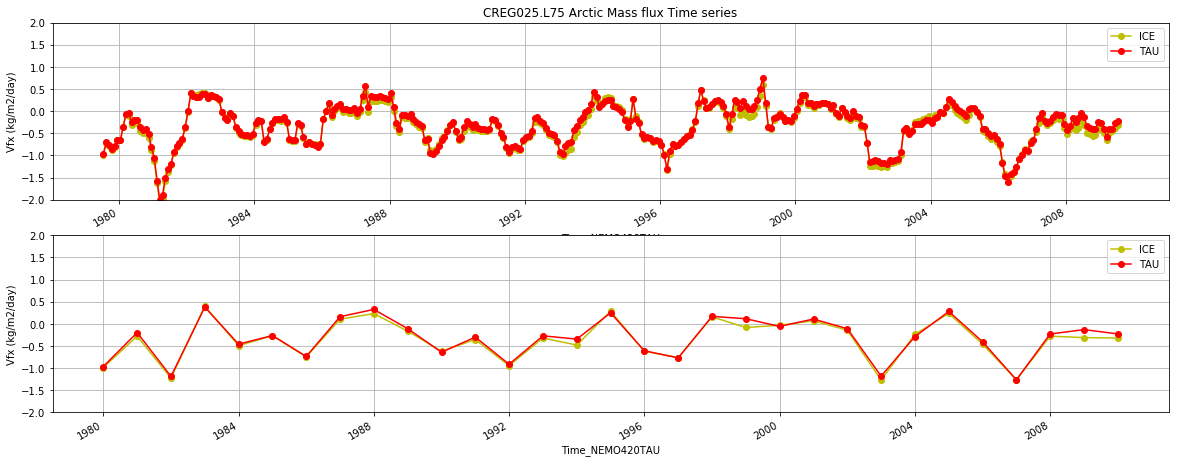

In [60]:

year_min=1978
year_max=2018
plt.figure(figsize=(20,15))
plt.subplot(411)
#(ds_out['Tise_era01_VFX'].rolling(Time_era01=12,center=True).mean()*86400.).plot(marker='o',label='NEMO3.6',color='r')
#(ds_out['Tise_era01LAS_VFX'].rolling(Time_era01LAS=12,center=True).mean()*86400.).plot(marker='o',label='NEMO4.0.5',color='y')
#(ds_out['Tise_NEMO420_VFX'].rolling(Time_NEMO420=12,center=True).mean()*86400.).plot(marker='o',label='NEMO4.2.0',color='b')
#(ds_out['Tise_NEMO420PCA_VFX'].rolling(Time_NEMO420PCA=12,center=True).mean()*86400.).plot(marker='o',label='PCA',color=cmap[3])
#(ds_out['Tise_NEMO420OPA_VFX'].rolling(Time_NEMO420OPA=12,center=True).mean()*86400.).plot(marker='o',label='OPA',color=cmap[3])
#(ds_out['Tise_NEMO420CIO_VFX'].rolling(Time_NEMO420CIO=12,center=True).mean()*86400.).plot(marker='o',label='CIO',color='grey')
#(ds_out['Tise_NEMO420DRG_VFX'].rolling(Time_NEMO420DRG=12,center=True).mean()*86400.).plot(marker='o',label='DRG',color='purple')
#(ds_out['Tise_NEMO420RAT_VFX'].rolling(Time_NEMO420RAT=12,center=True).mean()*86400.).plot(marker='o',label='RAT',color='purple')
#(ds_out['Tise_NEMO420PSA_VFX'].rolling(Time_NEMO420PSA=12,center=True).mean()*86400.).plot(marker='o',label='PSA',color='grey')
#(ds_out['Tise_NEMO420LAN_VFX'].rolling(Time_NEMO420LAN=12,center=True).mean()*86400.).plot(marker='o',label='LAN',color=cmap[8])
#(ds_out['Tise_NEMO420REY_VFX'].rolling(Time_NEMO420REY=12,center=True).mean()*86400.).plot(marker='o',label='REY',color='purple')
#(ds_out['Tise_NEMO420QUA_VFX'].rolling(Time_NEMO420QUA=12,center=True).mean()*86400.).plot(marker='o',label='QUA',color=cmap[8])
#(ds_out['Tise_NEMO420YES_VFX'].rolling(Time_NEMO420YES=12,center=True).mean()*86400.).plot(marker='o',label='YES',color=cmap[3])
#(ds_out['Tise_NEMO420RIP_VFX'].rolling(Time_NEMO420RIP=12,center=True).mean()*86400.).plot(marker='o',label='RIP',color='r')
#(ds_out['Tise_NEMO420BLP_VFX'].rolling(Time_NEMO420BLP=12,center=True).mean()*86400.).plot(marker='o',label='BLP',color='y')
#(ds_out['Tise_NEMO420ASH_VFX'].rolling(Time_NEMO420ASH=12,center=True).mean()*86400.).plot(marker='o',label='ASH',color='r')
(ds_out['Tise_NEMO420ICE_VFX'].rolling(Time_NEMO420ICE=12,center=True).mean()*86400.).plot(marker='o',label='ICE',color='y')
(ds_out['Tise_NEMO420TAU_VFX'].rolling(Time_NEMO420TAU=12,center=True).mean()*86400.).plot(marker='o',label='TAU',color='r')

plt.ylim([-2,2])
plt.title('CREG025.L75 Arctic Mass flux Time series')
plt.ylabel('Vfx (kg/m2/day)')
plt.grid(True)
plt.legend()


plt.subplot(412)
#(ds_out['Tise_era01_VFX'].resample(Time_era01='1Y').mean()*86400.).plot(marker='o',label='NEMO3.6',color='r')
#(ds_out['Tise_era01LAS_VFX'].resample(Time_era01LAS='1Y').mean()*86400.).plot(marker='o',label='NEMO4.0.5',color='y')
#(ds_out['Tise_NEMO420_VFX'].resample(Time_NEMO420='1Y').mean()*86400.).plot(marker='o',label='NEMO4.2.0',color='b')
#(ds_out['Tise_NEMO420PCA_VFX'].resample(Time_NEMO420PCA='1Y').mean()*86400.).plot(marker='o',label='PCA',color=cmap[3])
#(ds_out['Tise_NEMO420OPA_VFX'].resample(Time_NEMO420OPA='1Y').mean()*86400.).plot(marker='o',label='OPA',color=cmap[3])
#(ds_out['Tise_NEMO420CIO_VFX'].resample(Time_NEMO420CIO='1Y').mean()*86400.).plot(marker='o',label='CIO',color='grey')
#(ds_out['Tise_NEMO420DRG_VFX'].resample(Time_NEMO420DRG='1Y').mean()*86400.).plot(marker='o',label='DRG',color='purple')
#(ds_out['Tise_NEMO420RAT_VFX'].resample(Time_NEMO420RAT='1Y').mean()*86400.).plot(marker='o',label='RAT',color='purple')
#(ds_out['Tise_NEMO420PSA_VFX'].resample(Time_NEMO420PSA='1Y').mean()*86400.).plot(marker='o',label='PSA',color='grey')
#(ds_out['Tise_NEMO420LAN_VFX'].resample(Time_NEMO420LAN='1Y').mean()*86400.).plot(marker='o',label='LAN',color=cmap[8])
#(ds_out['Tise_NEMO420REY_VFX'].resample(Time_NEMO420REY='1Y').mean()*86400.).plot(marker='o',label='RRY',color='purple')
#(ds_out['Tise_NEMO420QUA_VFX'].resample(Time_NEMO420QUA='1Y').mean()*86400.).plot(marker='o',label='QUA',color=cmap[8])
#(ds_out['Tise_NEMO420YES_VFX'].resample(Time_NEMO420YES='1Y').mean()*86400.).plot(marker='o',label='YES',color=cmap[3])
#(ds_out['Tise_NEMO420RIP_VFX'].resample(Time_NEMO420RIP='1Y').mean()*86400.).plot(marker='o',label='RIP',color='r')
#(ds_out['Tise_NEMO420BLP_VFX'].resample(Time_NEMO420BLP='1Y').mean()*86400.).plot(marker='o',label='BLP',color='y')
#(ds_out['Tise_NEMO420ASH_VFX'].resample(Time_NEMO420ASH='1Y').mean()*86400.).plot(marker='o',label='ASH',color='r')
(ds_out['Tise_NEMO420ICE_VFX'].resample(Time_NEMO420ICE='1Y').mean()*86400.).plot(marker='o',label='ICE',color='y')
(ds_out['Tise_NEMO420TAU_VFX'].resample(Time_NEMO420TAU='1Y').mean()*86400.).plot(marker='o',label='TAU',color='r')

plt.ylim([-2,2])
plt.ylabel('Vfx (kg/m2/day)')
plt.grid(True)
plt.legend()

if False:

    year_min=1978
    year_max=2018
    plt.figure(figsize=(20,15))
    plt.subplot(413)
    (ds_out['Tise_era01_SFX'].rolling(Time_era01=12,center=True).mean()*86400.).plot(marker='o',label='NEMO3.6',color='r')
    #(ds_out['Tise_era01LAS_SFX'].rolling(Time_era01LAS=12,center=True).mean()*86400.).plot(marker='o',label='NEMO4.0.5',color='y')
    #(ds_out['Tise_NEMO420_SFX'].rolling(Time_NEMO420=12,center=True).mean()*86400.).plot(marker='o',label='NEMO4.2.0',color='b')
    #(ds_out['Tise_NEMO420PCA_SFX'].rolling(Time_NEMO420PCA=12,center=True).mean()*86400.).plot(marker='o',label='PCA',color=cmap[3])
    #(ds_out['Tise_NEMO420OPA_SFX'].rolling(Time_NEMO420OPA=12,center=True).mean()*86400.).plot(marker='o',label='OPA',color=cmap[3])
    #(ds_out['Tise_NEMO420CIO_SFX'].rolling(Time_NEMO420CIO=12,center=True).mean()*86400.).plot(marker='o',label='CIO',color='grey')
    #(ds_out['Tise_NEMO420DRG_SFX'].rolling(Time_NEMO420DRG=12,center=True).mean()*86400.).plot(marker='o',label='DRG',color='purple')
    #(ds_out['Tise_NEMO420RAT_SFX'].rolling(Time_NEMO420RAT=12,center=True).mean()*86400.).plot(marker='o',label='RAT',color='purple')
    #(ds_out['Tise_NEMO420PSA_SFX'].rolling(Time_NEMO420PSA=12,center=True).mean()*86400.).plot(marker='o',label='PSA',color='grey')
    #(ds_out['Tise_NEMO420LAN_SFX'].rolling(Time_NEMO420LAN=12,center=True).mean()*86400.).plot(marker='o',label='LAN',color=cmap[8])
    (ds_out['Tise_NEMO420REY_SFX'].rolling(Time_NEMO420REY=12,center=True).mean()*86400.).plot(marker='o',label='REY',color='purple')
    #(ds_out['Tise_NEMO420QUA_SFX'].rolling(Time_NEMO420QUA=12,center=True).mean()*86400.).plot(marker='o',label='QUA',color=cmap[8])

    #plt.ylim([-2,2])
    plt.title('CREG025.L75 Arctic Salt flux Time series')
    plt.ylabel('Sfx (kg/m2/day)')
    plt.grid(True)
    plt.legend()


    plt.subplot(414)
    (ds_out['Tise_era01_SFX'].resample(Time_era01='1Y').mean()*86400.).plot(marker='o',label='NEMO3.6',color='r')
    #(ds_out['Tise_era01LAS_SFX'].resample(Time_era01LAS='1Y').mean()*86400.).plot(marker='o',label='NEMO4.0.5',color='y')
    #(ds_out['Tise_NEMO420_SFX'].resample(Time_NEMO420='1Y').mean()*86400.).plot(marker='o',label='NEMO4.2.0',color='b')
    #(ds_out['Tise_NEMO420PCA_SFX'].resample(Time_NEMO420PCA='1Y').mean()*86400.).plot(marker='o',label='PCA',color=cmap[3])
    #(ds_out['Tise_NEMO420OPA_SFX'].resample(Time_NEMO420OPA='1Y').mean()*86400.).plot(marker='o',label='OPA',color=cmap[3])
    #(ds_out['Tise_NEMO420CIO_SFX'].resample(Time_NEMO420CIO='1Y').mean()*86400.).plot(marker='o',label='CIO',color='grey')
    #(ds_out['Tise_NEMO420DRG_SFX'].resample(Time_NEMO420DRG='1Y').mean()*86400.).plot(marker='o',label='DRG',color='purple')
    #(ds_out['Tise_NEMO420RAT_SFX'].resample(Time_NEMO420RAT='1Y').mean()*86400.).plot(marker='o',label='RAT',color='purple')    
    #(ds_out['Tise_NEMO420PSA_SFX'].resample(Time_NEMO420PSA='1Y').mean()*86400.).plot(marker='o',label='PSA',color='grey')
    #(ds_out['Tise_NEMO420LAN_SFX'].resample(Time_NEMO420LAN='1Y').mean()*86400.).plot(marker='o',label='LAN',color=cmap[8])
    (ds_out['Tise_NEMO420REY_SFX'].resample(Time_NEMO420RRY='1Y').mean()*86400.).plot(marker='o',label='REY',color='purple')
    #(ds_out['Tise_NEMO420QUA_SFX'].resample(Time_NEMO420QUA='1Y').mean()*86400.).plot(marker='o',label='QUA',color=cmap[8])

    #plt.ylim([-2,2])
    plt.ylabel('Sfx (kg/m2/day)')
    plt.grid(True)
    plt.legend()


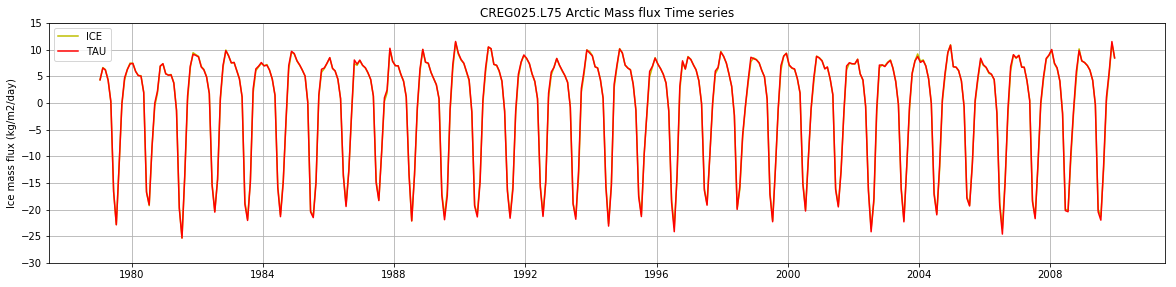

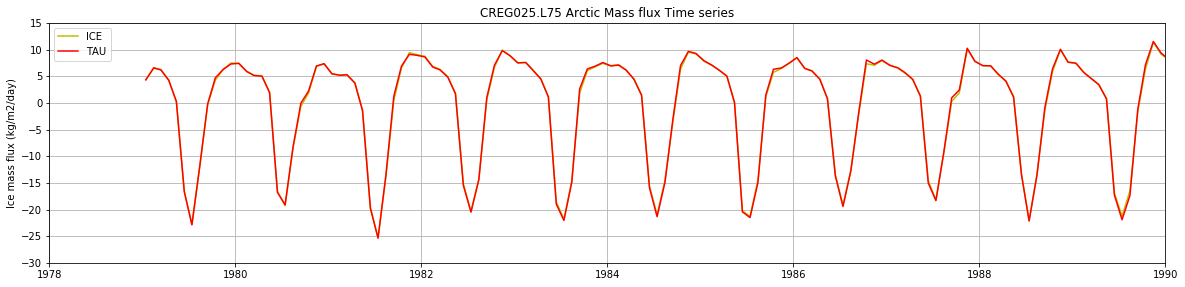

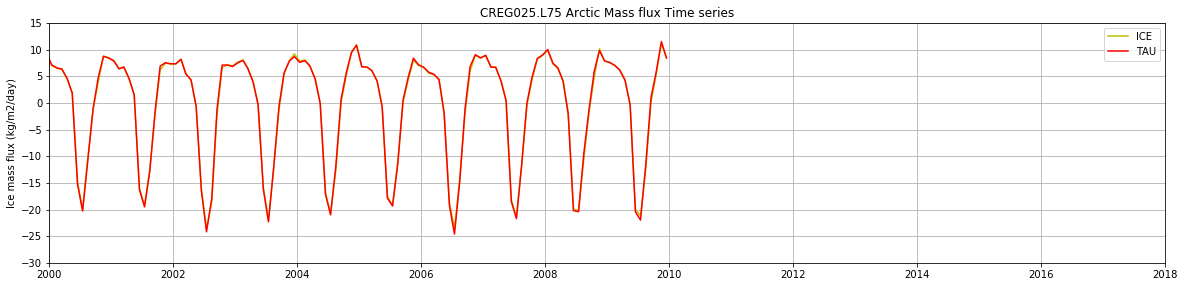

In [61]:
year_min=1978
year_max=2018
plt.figure(figsize=(20,15))
plt.subplot(311)
#plt.plot(Time_era01,Tise_era01['LongTS_VFX']*86400.,color='r',label='NEMO3.6')
#plt.plot(Time_era01LAS,Tise_era01LAS['LongTS_VFX']*86400.,color='y',label='NEMO4.0.5')
#plt.plot(Time_NEMO420,Tise_NEMO420['LongTS_VFX']*86400.,color='b',label='NEMO4.2.0')
#plt.plot(Time_NEMO420PCA,-1.*Tise_NEMO420PCA['LongTS_VFX']*86400.,color=cmap[3],label='PCA')
#plt.plot(Time_NEMO420OPA,-1.*Tise_NEMO420OPA['LongTS_VFX']*86400.,color=cmap[3],label='OPA')
#plt.plot(Time_NEMO420CIO,-1.*Tise_NEMO420CIO['LongTS_VFX']*86400.,color='grey',label='CIO')
#plt.plot(Time_NEMO420DRG,-1.*Tise_NEMO420DRG['LongTS_VFX']*86400.,color='purple',label='DRG')
#plt.plot(Time_NEMO420RAT,-1.*Tise_NEMO420RAT['LongTS_VFX']*86400.,color='purple',label='RAT')
#plt.plot(Time_NEMO420PSA,-1.*Tise_NEMO420PSA['LongTS_VFX']*86400.,color='grey',label='PSA')
#plt.plot(Time_NEMO420LAN,-1.*Tise_NEMO420LAN['LongTS_VFX']*86400.,color=cmap[8],label='LAN')
#plt.plot(Time_NEMO420REY,-1.*Tise_NEMO420REY['LongTS_VFX']*86400.,color='purple',label='REY')
#plt.plot(Time_NEMO420QUA,-1.*Tise_NEMO420QUA['LongTS_VFX']*86400.,color=cmap[8],label='QUA')
#plt.plot(Time_NEMO420YES,-1.*Tise_NEMO420YES['LongTS_VFX']*86400.,color=cmap[3],label='YES')
#plt.plot(Time_NEMO420RIP,-1.*Tise_NEMO420RIP['LongTS_VFX']*86400.,color='r',label='RIP')
#plt.plot(Time_NEMO420BLP,-1.*Tise_NEMO420BLP['LongTS_VFX']*86400.,color='y',label='BLP')
#plt.plot(Time_NEMO420ASH,-1.*Tise_NEMO420ASH['LongTS_VFX']*86400.,color='r',label='ASH')
plt.plot(Time_NEMO420ICE,-1.*Tise_NEMO420ICE['LongTS_VFX']*86400.,color='y',label='ICE')
plt.plot(Time_NEMO420TAU,-1.*Tise_NEMO420TAU['LongTS_VFX']*86400.,color='r',label='TAU')

#plt.xlim([year_min,year_max])
plt.ylim([-30,15])
plt.title('CREG025.L75 Arctic Mass flux Time series')
plt.ylabel('Ice mass flux (kg/m2/day)')
plt.grid(True)
plt.legend()


year_min=1978
year_max=1990
plt.figure(figsize=(20,15))
plt.subplot(312)
#plt.plot(Time_era01,Tise_era01['LongTS_VFX']*86400.,color='r',label='NEMO3.6')
#plt.plot(Time_era01LAS,Tise_era01LAS['LongTS_VFX']*86400.,color='y',label='NEMO4.0.5')
#plt.plot(Time_NEMO420,Tise_NEMO420['LongTS_VFX']*86400.,color='b',label='NEMO4.2.0')
#plt.plot(Time_NEMO420PCA,-1.*Tise_NEMO420PCA['LongTS_VFX']*86400.,color=cmap[3],label='PCA')
#plt.plot(Time_NEMO420OPA,-1.*Tise_NEMO420OPA['LongTS_VFX']*86400.,color=cmap[3],label='OPA')
#plt.plot(Time_NEMO420CIO,-1.*Tise_NEMO420CIO['LongTS_VFX']*86400.,color='grey',label='CIO')
#plt.plot(Time_NEMO420DRG,-1.*Tise_NEMO420DRG['LongTS_VFX']*86400.,color='purple',label='DRG')
#plt.plot(Time_NEMO420RAT,-1.*Tise_NEMO420RAT['LongTS_VFX']*86400.,color='purple',label='RAT')
#plt.plot(Time_NEMO420PSA,-1.*Tise_NEMO420PSA['LongTS_VFX']*86400.,color='grey',label='PSA')
#plt.plot(Time_NEMO420LAN,-1.*Tise_NEMO420LAN['LongTS_VFX']*86400.,color=cmap[8],label='LAN')
#plt.plot(Time_NEMO420REY,-1.*Tise_NEMO420REY['LongTS_VFX']*86400.,color=cmap[3],label='REY')
#plt.plot(Time_NEMO420QUA,-1.*Tise_NEMO420QUA['LongTS_VFX']*86400.,color=cmap[8],label='QUA')
#plt.plot(Time_NEMO420YES,-1.*Tise_NEMO420YES['LongTS_VFX']*86400.,color=cmap[3],label='YES')
#plt.plot(Time_NEMO420RIP,-1.*Tise_NEMO420RIP['LongTS_VFX']*86400.,color='r',label='RIP')
#plt.plot(Time_NEMO420BLP,-1.*Tise_NEMO420BLP['LongTS_VFX']*86400.,color='y',label='BLP')
#plt.plot(Time_NEMO420ASH,-1.*Tise_NEMO420ASH['LongTS_VFX']*86400.,color='r',label='ASH')
plt.plot(Time_NEMO420ICE,-1.*Tise_NEMO420ICE['LongTS_VFX']*86400.,color='y',label='ICE')
plt.plot(Time_NEMO420TAU,-1.*Tise_NEMO420TAU['LongTS_VFX']*86400.,color='r',label='TAU')

plt.xlim([str(year_min),str(year_max)])
plt.ylim([-30,15])
plt.title('CREG025.L75 Arctic Mass flux Time series')
plt.ylabel('Ice mass flux (kg/m2/day)')
plt.grid(True)
plt.legend()

year_min=2000
year_max=2018
plt.figure(figsize=(20,15))
plt.subplot(313)
#plt.plot(Time_era01,Tise_era01['LongTS_VFX']*86400.,color='r',label='NEMO3.6')
#plt.plot(Time_era01LAS,Tise_era01LAS['LongTS_VFX']*86400.,color='y',label='NEMO4.0.5')
#plt.plot(Time_NEMO420,Tise_NEMO420['LongTS_VFX']*86400.,color='b',label='NEMO4.2.0')
#plt.plot(Time_NEMO420PCA,-1.*Tise_NEMO420PCA['LongTS_VFX']*86400.,color=cmap[3],label='PCA')
#plt.plot(Time_NEMO420OPA,-1.*Tise_NEMO420OPA['LongTS_VFX']*86400.,color=cmap[3],label='OPA')
#plt.plot(Time_NEMO420CIO,-1.*Tise_NEMO420CIO['LongTS_VFX']*86400.,color='grey',label='CIO')
#plt.plot(Time_NEMO420DRG,-1.*Tise_NEMO420DRG['LongTS_VFX']*86400.,color='purple',label='DRG')
#plt.plot(Time_NEMO420RAT,-1.*Tise_NEMO420RAT['LongTS_VFX']*86400.,color='purple',label='RAT')
#plt.plot(Time_NEMO420PSA,-1.*Tise_NEMO420PSA['LongTS_VFX']*86400.,color='grey',label='PSA')
#plt.plot(Time_NEMO420LAN,-1.*Tise_NEMO420LAN['LongTS_VFX']*86400.,color=cmap[8],label='LAN')
#plt.plot(Time_NEMO420REY,-1.*Tise_NEMO420REY['LongTS_VFX']*86400.,color=cmap[3],label='REY')
#plt.plot(Time_NEMO420QUA,-1.*Tise_NEMO420QUA['LongTS_VFX']*86400.,color=cmap[8],label='QUA')
#plt.plot(Time_NEMO420RIP,-1.*Tise_NEMO420RIP['LongTS_VFX']*86400.,color='r',label='RIP')
#plt.plot(Time_NEMO420BLP,-1.*Tise_NEMO420BLP['LongTS_VFX']*86400.,color='y',label='BLP')
#plt.plot(Time_NEMO420ASH,-1.*Tise_NEMO420ASH['LongTS_VFX']*86400.,color='r',label='ASH')
plt.plot(Time_NEMO420ICE,-1.*Tise_NEMO420ICE['LongTS_VFX']*86400.,color='y',label='ICE')
plt.plot(Time_NEMO420TAU,-1.*Tise_NEMO420TAU['LongTS_VFX']*86400.,color='r',label='TAU')

plt.xlim([str(year_min),str(year_max)])
plt.ylim([-30,15])
plt.title('CREG025.L75 Arctic Mass flux Time series')
plt.ylabel('Ice mass flux (kg/m2/day)')

plt.grid(True)
plt.legend()



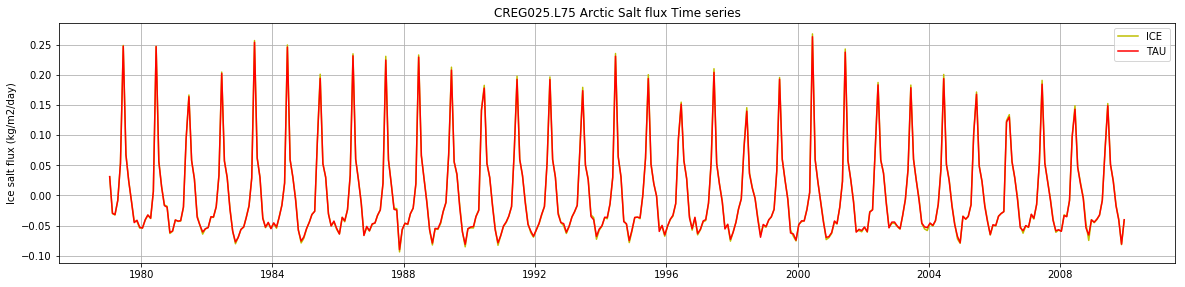

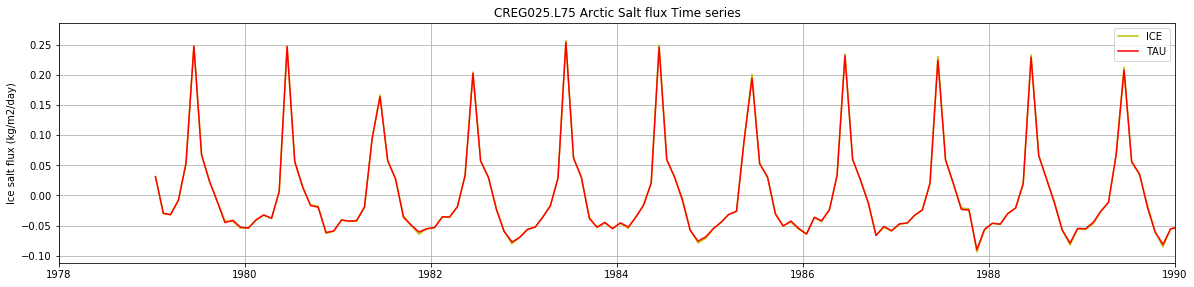

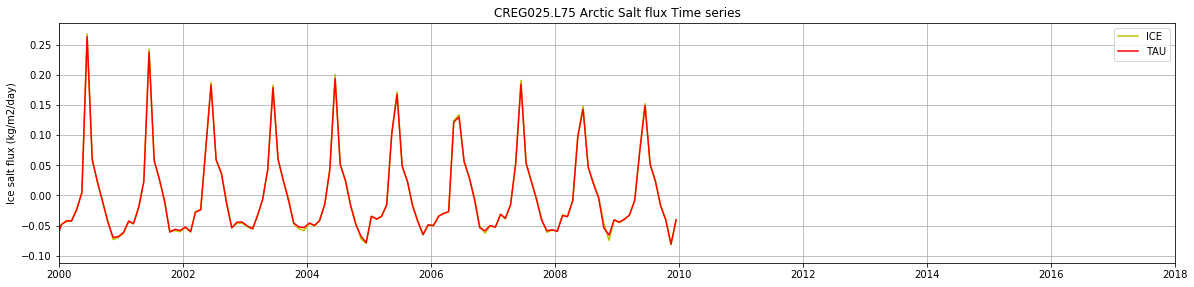

In [62]:
year_min=1978
year_max=2018
alpha_era1=1e-3
plt.figure(figsize=(20,15))
plt.subplot(311)
#plt.plot(Time_era01,Tise_era01['LongTS_SFX']*alpha_era1,color='r',label='NEMO3.6')
#plt.plot(Time_era01LAS,Tise_era01LAS['LongTS_SFX']*86400.,color='y',label='NEMO4.0.5')
#plt.plot(Time_NEMO420,Tise_NEMO420['LongTS_SFX']*86400.,color='b',label='NEMO4.2.0')
#plt.plot(Time_NEMO420PCA,Tise_NEMO420PCA['LongTS_SFX']*86400.,color=cmap[3],label='PCA')
#plt.plot(Time_NEMO420OPA,Tise_NEMO420OPA['LongTS_SFX']*86400.,color=cmap[3],label='OPA')
#plt.plot(Time_NEMO420CIO,Tise_NEMO420CIO['LongTS_SFX']*86400.,color='grey',label='CIO')
#plt.plot(Time_NEMO420DRG,Tise_NEMO420DRG['LongTS_SFX']*86400.,color='purple',label='DRG')
#plt.plot(Time_NEMO420RAT,Tise_NEMO420RAT['LongTS_SFX']*86400.,color='purple',label='RAT')
#plt.plot(Time_NEMO420PSA,Tise_NEMO420PSA['LongTS_SFX']*86400.,color='grey',label='PSA')
#plt.plot(Time_NEMO420LAN,Tise_NEMO420LAN['LongTS_SFX']*86400.,color=cmap[8],label='LAN')
#plt.plot(Time_NEMO420REY,Tise_NEMO420REY['LongTS_SFX']*86400.,color=cmap[3],label='REY')
#plt.plot(Time_NEMO420QUA,Tise_NEMO420QUA['LongTS_SFX']*86400.,color=cmap[8],label='QUA')
#plt.plot(Time_NEMO420YES,Tise_NEMO420YES['LongTS_SFX']*86400.,color=cmap[3],label='YES')
#plt.plot(Time_NEMO420RIP,Tise_NEMO420RIP['LongTS_SFX']*86400.,color='r',label='RIP')
#plt.plot(Time_NEMO420BLP,Tise_NEMO420BLP['LongTS_SFX']*86400.,color='y',label='BLP')
#plt.plot(Time_NEMO420ASH,Tise_NEMO420ASH['LongTS_SFX']*86400.,color='r',label='ASH')
plt.plot(Time_NEMO420ICE,Tise_NEMO420ICE['LongTS_SFX']*86400.,color='y',label='ICE')
plt.plot(Time_NEMO420TAU,Tise_NEMO420TAU['LongTS_SFX']*86400.,color='r',label='TAU')

#plt.xlim([year_min,year_max])
#plt.ylim([-30,15])
plt.title('CREG025.L75 Arctic Salt flux Time series')
plt.ylabel('Ice salt flux (kg/m2/day)')
plt.grid(True)
plt.legend()


year_min=1978
year_max=1990
plt.figure(figsize=(20,15))
plt.subplot(312)
#plt.plot(Time_era01,Tise_era01['LongTS_SFX']*alpha_era1,color='r',label='NEMO3.6')
#plt.plot(Time_era01LAS,Tise_era01LAS['LongTS_SFX']*86400.,color='y',label='NEMO4.0.5')
#plt.plot(Time_NEMO420,Tise_NEMO420['LongTS_SFX']*86400.,color='b',label='NEMO4.2.0')
#plt.plot(Time_NEMO420PCA,Tise_NEMO420PCA['LongTS_SFX']*86400.,color=cmap[3],label='PCA')
#plt.plot(Time_NEMO420OPA,Tise_NEMO420OPA['LongTS_SFX']*86400.,color=cmap[3],label='OPA')
#plt.plot(Time_NEMO420CIO,Tise_NEMO420CIO['LongTS_SFX']*86400.,color='grey',label='CIO')
#plt.plot(Time_NEMO420DRG,Tise_NEMO420DRG['LongTS_SFX']*86400.,color='purple',label='DRG')
#plt.plot(Time_NEMO420RAT,Tise_NEMO420RAT['LongTS_SFX']*86400.,color='purple',label='RAT')
#plt.plot(Time_NEMO420PSA,Tise_NEMO420PSA['LongTS_SFX']*86400.,color='grey',label='PSA')
#plt.plot(Time_NEMO420LAN,Tise_NEMO420LAN['LongTS_SFX']*86400.,color=cmap[8],label='LAN')
#plt.plot(Time_NEMO420REY,Tise_NEMO420REY['LongTS_SFX']*86400.,color=cmap[3],label='REY')
#plt.plot(Time_NEMO420QUA,Tise_NEMO420QUA['LongTS_SFX']*86400.,color=cmap[8],label='QUA')
#plt.plot(Time_NEMO420RIP,Tise_NEMO420RIP['LongTS_SFX']*86400.,color='r',label='RIP')
#plt.plot(Time_NEMO420BLP,Tise_NEMO420BLP['LongTS_SFX']*86400.,color='y',label='BLP')
#plt.plot(Time_NEMO420ASH,Tise_NEMO420ASH['LongTS_SFX']*86400.,color='r',label='ASH')
plt.plot(Time_NEMO420ICE,Tise_NEMO420ICE['LongTS_SFX']*86400.,color='y',label='ICE')
plt.plot(Time_NEMO420TAU,Tise_NEMO420TAU['LongTS_SFX']*86400.,color='r',label='TAU')

plt.xlim([str(year_min),str(year_max)])
#plt.ylim([-30,15])
plt.title('CREG025.L75 Arctic Salt flux Time series')
plt.ylabel('Ice salt flux (kg/m2/day)')
plt.grid(True)
plt.legend()


year_min=2000
year_max=2018
plt.figure(figsize=(20,15))
plt.subplot(313)
#plt.plot(Time_era01,Tise_era01['LongTS_SFX']*alpha_era1,color='r',label='NEMO3.6')
#plt.plot(Time_era01LAS,Tise_era01LAS['LongTS_SFX']*86400.,color='y',label='NEMO4.0.5')
#plt.plot(Time_NEMO420,Tise_NEMO420['LongTS_SFX']*86400.,color='b',label='NEMO4.2.0')
#plt.plot(Time_NEMO420PCA,Tise_NEMO420PCA['LongTS_SFX']*86400.,color=cmap[3],label='PCA')
#plt.plot(Time_NEMO420OPA,Tise_NEMO420OPA['LongTS_SFX']*86400.,color=cmap[3],label='OPA')
#plt.plot(Time_NEMO420CIO,Tise_NEMO420CIO['LongTS_SFX']*86400.,color='grey',label='CIO')
#plt.plot(Time_NEMO420DRG,Tise_NEMO420DRG['LongTS_SFX']*86400.,color='purple',label='DRG')
#plt.plot(Time_NEMO420RAT,Tise_NEMO420RAT['LongTS_SFX']*86400.,color='purple',label='RAT')
#plt.plot(Time_NEMO420PSA,Tise_NEMO420PSA['LongTS_SFX']*86400.,color='grey',label='PSA')
#plt.plot(Time_NEMO420LAN,Tise_NEMO420LAN['LongTS_SFX']*86400.,color=cmap[8],label='LAN')
#plt.plot(Time_NEMO420REY,Tise_NEMO420REY['LongTS_SFX']*86400.,color=cmap[3],label='REY')
#plt.plot(Time_NEMO420QUA,Tise_NEMO420QUA['LongTS_SFX']*86400.,color=cmap[8],label='QUA')
#plt.plot(Time_NEMO420RIP,Tise_NEMO420RIP['LongTS_SFX']*86400.,color='r',label='RIP')
#plt.plot(Time_NEMO420BLP,Tise_NEMO420BLP['LongTS_SFX']*86400.,color='y',label='BLP')
#plt.plot(Time_NEMO420ASH,Tise_NEMO420ASH['LongTS_SFX']*86400.,color='r',label='ASH')
plt.plot(Time_NEMO420ICE,Tise_NEMO420ICE['LongTS_SFX']*86400.,color='y',label='ICE')
plt.plot(Time_NEMO420TAU,Tise_NEMO420TAU['LongTS_SFX']*86400.,color='r',label='TAU')

plt.xlim([str(year_min),str(year_max)])
#plt.ylim([-30,15])
plt.title('CREG025.L75 Arctic Salt flux Time series')
plt.ylabel('Ice salt flux (kg/m2/day)')

plt.grid(True)
plt.legend()

>> # MOORINGS Time-series 

In [63]:
def MOOR_ZT(expname,moorT,ds,year_min,year_max):
    plt.figure(figsize=(20,15))
    plt.subplot(211)
    ds['Temp'].plot(levels=21,vmin=-2.,vmax=2.,cmap='RdYlBu_r',extend='both')
    plt.xlim([year_min,year_max])
    plt.ylim([-200,0])
    plt.xlabel('Years')
    plt.title('CREG025.L75 '+expname+' Mooring '+moorT+' Time series')
    plt.ylabel('Depth (m)')
    plt.grid(True)
    plt.legend()

    plt.subplot(212)
    ds['Sal'].plot(levels=21,vmin=28.,vmax=36.,cmap='Spectral_r',extend='both')
    plt.xlim([year_min,year_max])
    plt.ylim([-200.,0.])
    plt.xlabel('Years')
    plt.ylabel('Depth (m)')
    plt.grid(True)
    plt.legend()

In [64]:
def MOOR_ZTDIFF(expname,moorT,ds,ds_ref,year_min,year_max):
    plt.figure(figsize=(20,15))
    plt.subplot(211)
    #(ds['Temp']-ds_ref['Temp']).plot(levels=21,vmin=-2.,vmax=2.,cmap='RdYlBu_r',extend='both')
    (ds['Temp']-ds_ref['Temp']).plot(levels=21,vmin=-1.,vmax=1.,cmap='RdYlBu_r',extend='both')
    plt.xlim([year_min,year_max])
    plt.ylim([-1000,0])
    plt.xlabel('Years')
    plt.title('CREG025.L75 '+expname+' Mooring '+moorT+' Time series')
    plt.ylabel('Depth (m)')
    plt.grid(True)
    plt.legend()

    plt.subplot(212)
#    (ds['Sal']-ds_ref['Sal']).plot(levels=21,vmin=-1.,vmax=1.,cmap='RdYlBu_r',extend='both')
    (ds['Sal']-ds_ref['Sal']).plot(levels=21,vmin=-1.,vmax=1.,cmap='Spectral_r',extend='both')

    plt.xlim([year_min,year_max])
    plt.ylim([-1000.,0.])
    plt.xlabel('Years')
    plt.ylabel('Depth (m)')
    plt.grid(True)
    plt.legend()

In [65]:
MPATH="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/"

In [66]:
dic_ERA={'name':'ERA01',\
         'Lpath':'CREG025.L75-ERA01-MEAN/MONITOR/NCDF-CREG025.L75/',\
         'fileinARCB':'CREG025.L75-ERA01_MOOR-ARC-B_y2019LASTy.nc',\
         'fileinEURA':'CREG025.L75-ERA01_MOOR-EUR-B_y2019LASTy.nc'}
dic_LAS={'name':'LAS',\
         'Lpath':'CREG025.L75-NEMO420-MEAN/MONARC/MOORINGS/NCDF-CREG025.L75/CREG025.L75-ERA01NEM405LAS/',\
         'fileinARCB':'CREG025.L75-ERA01NEM405LAS_MOOR-ARC-B_y2010LASTy.nc',\
         'fileinEURA':'CREG025.L75-ERA01NEM405LAS_MOOR-EUR-B_y2010LASTy.nc'}
dic_NEMO420={'name':'NEMO420',\
         'Lpath':'CREG025.L75-NEMO420-MEAN/MONARC/MOORINGS/NCDF-CREG025.L75/CREG025.L75-NEMO420/',\
         'fileinARCB':'CREG025.L75-NEMO420_MOOR-ARC-B_y2016LASTy.nc',\
         'fileinEURA':'CREG025.L75-NEMO420_MOOR-EUR-B_y2016LASTy.nc'}

dic_NEMO420WND={'name':'NEMO420WND',\
         'Lpath':'CREG025.L75-NEMO420-MEAN/MONARC/MOORINGS/NCDF-CREG025.L75/CREG025.L75-NEMO420WND/',\
         'fileinARCB':'CREG025.L75-NEMO420WND_MOOR-ARC-B_y2000LASTy.nc',\
         'fileinEURA':'CREG025.L75-NEMO420WND_MOOR-EUR-B_y2000LASTy.nc'}

dic_NEMO420IRW={'name':'NEMO420IRW',\
         'Lpath':'CREG025.L75-NEMO420-MEAN/MONARC/MOORINGS/NCDF-CREG025.L75/CREG025.L75-NEMO420IRW/',\
         'fileinARCB':'CREG025.L75-NEMO420IRW_MOOR-ARC-B_y2001LASTy.nc',\
         'fileinEURA':'CREG025.L75-NEMO420IRW_MOOR-EUR-B_y2001LASTy.nc'}

dic_NEMO420PCA={'name':'NEMO420PCA',\
         'Lpath':'CREG025.L75-NEMO420-MEAN/MONARC/MOORINGS/NCDF-CREG025.L75/CREG025.L75-NEMO420PCA/',\
         'fileinARCB':'CREG025.L75-NEMO420PCA_MOOR-ARC-B_y2001LASTy.nc',\
         'fileinEURA':'CREG025.L75-NEMO420PCA_MOOR-EUR-B_y2001LASTy.nc'}

dic_NEMO420OPA={'name':'NEMO420OPA',\
         'Lpath':'CREG025.L75-NEMO420-MEAN/MONARC/MOORINGS/NCDF-CREG025.L75/CREG025.L75-NEMO420OPA/',\
         'fileinARCB':'CREG025.L75-NEMO420OPA_MOOR-ARC-B_y2010LASTy.nc',\
         'fileinEURA':'CREG025.L75-NEMO420OPA_MOOR-EUR-B_y2010LASTy.nc'}

dic_NEMO420CIO={'name':'NEMO420CIO',\
         'Lpath':'CREG025.L75-NEMO420-MEAN/MONARC/MOORINGS/NCDF-CREG025.L75/CREG025.L75-NEMO420CIO/',\
         'fileinARCB':'CREG025.L75-NEMO420CIO_MOOR-ARC-B_y2010LASTy.nc',\
         'fileinEURA':'CREG025.L75-NEMO420CIO_MOOR-EUR-B_y2010LASTy.nc'}

dic_NEMO420RAT={'name':'NEMO420RAT',\
         'Lpath':'CREG025.L75-NEMO420-MEAN/MONARC/MOORINGS/NCDF-CREG025.L75/CREG025.L75-NEMO420RAT/',\
         'fileinARCB':'CREG025.L75-NEMO420RAT_MOOR-ARC-B_y2010LASTy.nc',\
         'fileinEURA':'CREG025.L75-NEMO420RAT_MOOR-EUR-B_y2010LASTy.nc'}

dic_NEMO420PSA={'name':'NEMO420PSA',\
         'Lpath':'CREG025.L75-NEMO420-MEAN/MONARC/MOORINGS/NCDF-CREG025.L75/CREG025.L75-NEMO420PSA/',\
         'fileinARCB':'CREG025.L75-NEMO420PSA_MOOR-ARC-B_y2010LASTy.nc',\
         'fileinEURA':'CREG025.L75-NEMO420PSA_MOOR-EUR-B_y2010LASTy.nc'}

dic_NEMO420LAN={'name':'NEMO420LAN',\
         'Lpath':'CREG025.L75-NEMO420-MEAN/MONARC/MOORINGS/NCDF-CREG025.L75/CREG025.L75-NEMO420LAN/',\
         'fileinARCB':'CREG025.L75-NEMO420LAN_MOOR-ARC-B_y2010LASTy.nc',\
         'fileinEURA':'CREG025.L75-NEMO420LAN_MOOR-EUR-B_y2010LASTy.nc'}

dic_NEMO420QUA={'name':'NEMO420QUA',\
         'Lpath':'CREG025.L75-NEMO420-MEAN/MONARC/MOORINGS/NCDF-CREG025.L75/CREG025.L75-NEMO420QUA/',\
         'fileinARCB':'CREG025.L75-NEMO420QUA_MOOR-ARC-B_y2016LASTy.nc',\
         'fileinEURA':'CREG025.L75-NEMO420QUA_MOOR-EUR-B_y2016LASTy.nc'}

dic_NEMO420REY={'name':'NEMO420REY',\
         'Lpath':'CREG025.L75-NEMO420-MEAN/MONARC/MOORINGS/NCDF-CREG025.L75/CREG025.L75-NEMO420REY/',\
         'fileinARCB':'CREG025.L75-NEMO420REY_MOOR-ARC-B_y2010LASTy.nc',\
         'fileinEURA':'CREG025.L75-NEMO420REY_MOOR-EUR-B_y2010LASTy.nc'}

dic_NEMO420RIP={'name':'NEMO420RIP',\
         'Lpath':'CREG025.L75-NEMO420-MEAN/MONARC/MOORINGS/NCDF-CREG025.L75/CREG025.L75-NEMO420RIP/',\
         'fileinARCB':'CREG025.L75-NEMO420RIP_MOOR-ARC-B_y2010LASTy.nc',\
         'fileinEURA':'CREG025.L75-NEMO420RIP_MOOR-EUR-B_y2010LASTy.nc'}

dic_NEMO420BLP={'name':'NEMO420BLP',\
         'Lpath':'CREG025.L75-NEMO420-MEAN/MONARC/MOORINGS/NCDF-CREG025.L75/CREG025.L75-NEMO420BLP/',\
         'fileinARCB':'CREG025.L75-NEMO420BLP_MOOR-ARC-B_y2010LASTy.nc',\
         'fileinEURA':'CREG025.L75-NEMO420BLP_MOOR-EUR-B_y2010LASTy.nc'}

dic_NEMO420ASH={'name':'NEMO420ASH',\
         'Lpath':'CREG025.L75-NEMO420-MEAN/MONARC/MOORINGS/NCDF-CREG025.L75/CREG025.L75-NEMO420ASH/',\
         'fileinARCB':'CREG025.L75-NEMO420ASH_MOOR-ARC-B_y2010LASTy.nc',\
         'fileinEURA':'CREG025.L75-NEMO420ASH_MOOR-EUR-B_y2010LASTy.nc'}

dic_NEMO420ICE={'name':'NEMO420ICE',\
         'Lpath':'CREG025.L75-NEMO420-MEAN/MONARC/MOORINGS/NCDF-CREG025.L75/CREG025.L75-NEMO420ICE/',\
         'fileinARCB':'CREG025.L75-NEMO420ICE_MOOR-ARC-B_y2010LASTy.nc',\
         'fileinEURA':'CREG025.L75-NEMO420ICE_MOOR-EUR-B_y2010LASTy.nc'}

dic_NEMO420TAU={'name':'NEMO420TAU',\
         'Lpath':'CREG025.L75-NEMO420-MEAN/MONARC/MOORINGS/NCDF-CREG025.L75/CREG025.L75-NEMO420TAU/',\
         'fileinARCB':'CREG025.L75-NEMO420TAU_MOOR-ARC-B_y2010LASTy.nc',\
         'fileinEURA':'CREG025.L75-NEMO420TAU_MOOR-EUR-B_y2010LASTy.nc'}

In [67]:
#moor2plot=[dic_NEMO420,dic_NEMO420RAT,dic_NEMO420PSA,dic_NEMO420LAN,dic_NEMO420CIO]
moor2plot=[dic_NEMO420TAU]
#moor2plot=[dic_NEMO420OPA,dic_NEMO420CIO]
moor2plot
moorref=dic_NEMO420ICE

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


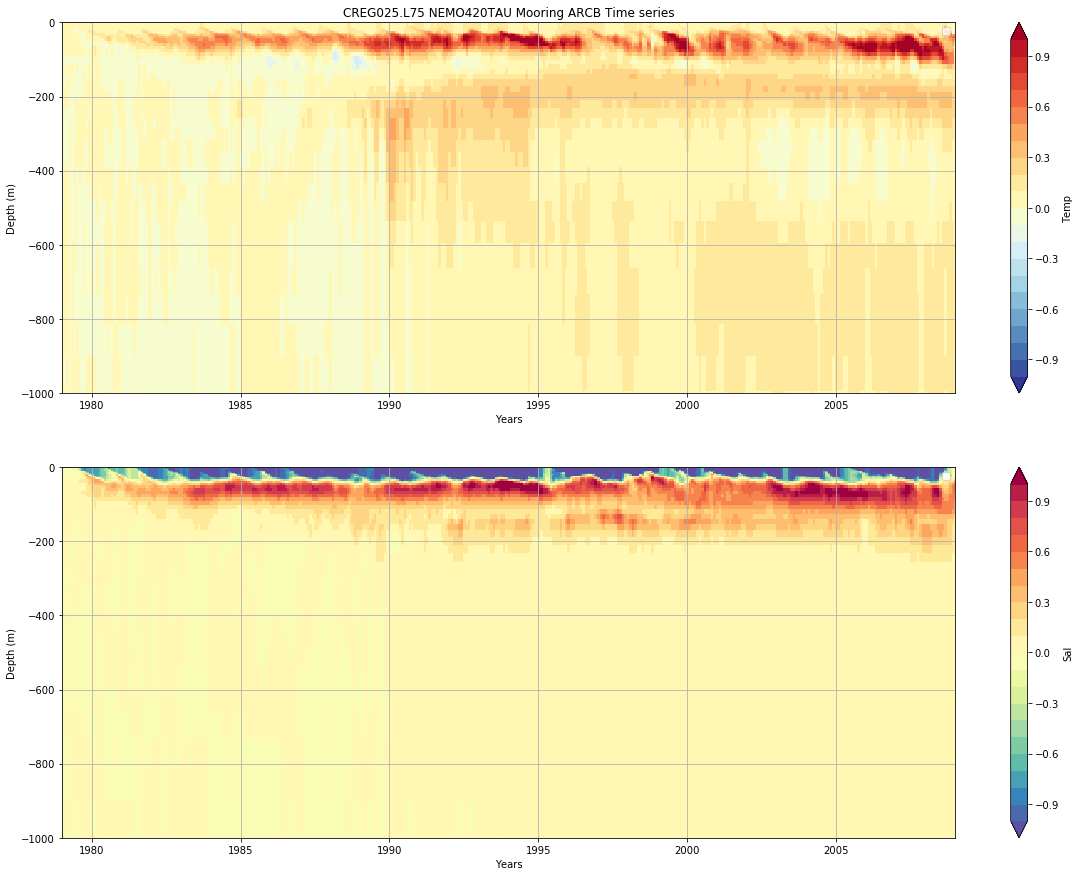

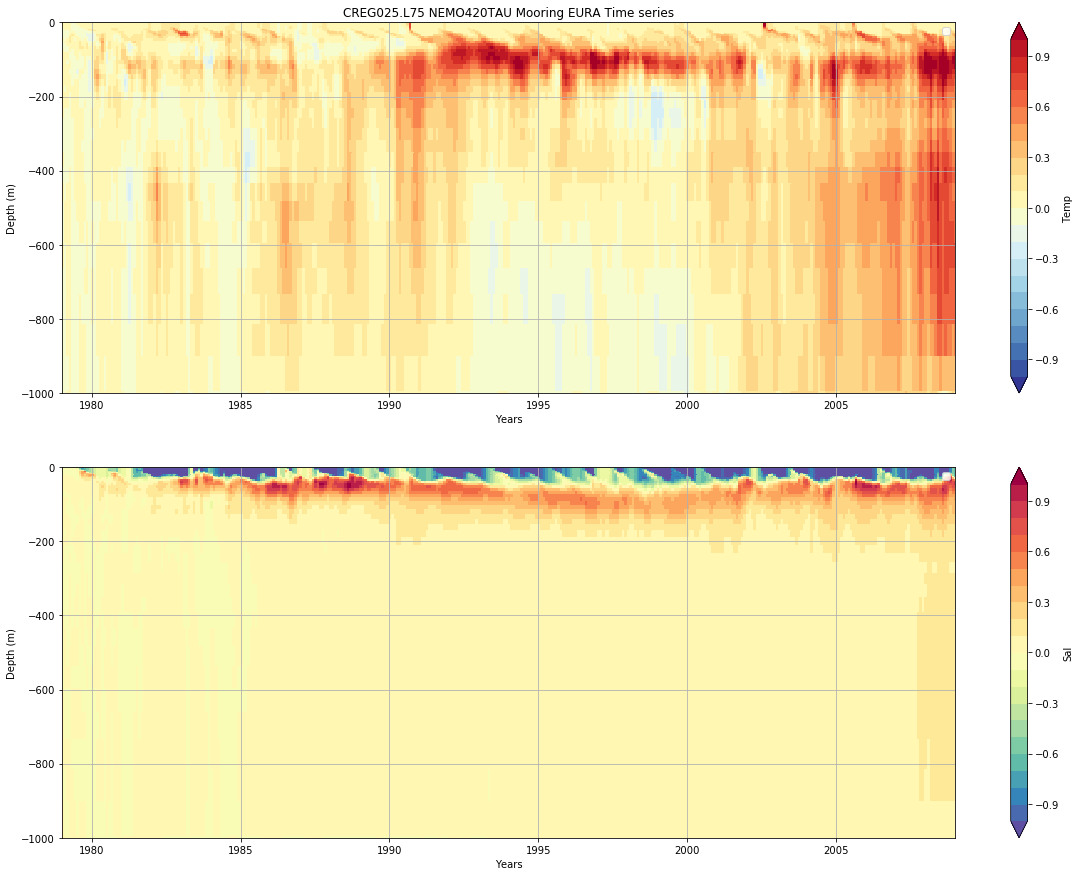

In [68]:
year_min=1979
year_max=2009
Make_diff=False

for moor in moor2plot :

    ds_read=xr.open_dataset(MPATH+moor['Lpath']+moor['fileinARCB'])
    ds_read
    ds_ref=xr.open_dataset(MPATH+moorref['Lpath']+moorref['fileinARCB'])
    #
    ds_toplot=xr.Dataset()
    ds_toplot.coords['z']=ds_read['Depth2D'][:,0]
    ds_toplot.coords['time']=ds_read['Time2D'][0,:]
    ds_toplot['Temp']=(('z','time'),ds_read['Temp'])
    ds_toplot['Sal']=(('z','time'),ds_read['Sal'])
    if Make_diff: 
        MOOR_ZT(moor['name'],'ARCB',ds_toplot,year_min,year_max)
    else:
        ds_mref=xr.Dataset()
        ds_mref.coords['z']=ds_ref['Depth2D'][:,0]
        ds_mref.coords['time']=ds_ref['Time2D'][0,:]
        ds_mref['Temp']=(('z','time'),ds_ref['Temp'])
        ds_mref['Sal']=(('z','time'),ds_ref['Sal'])
        MOOR_ZTDIFF(moor['name'],'ARCB',ds_toplot,ds_mref,year_min,year_max)
    
    
    ds_read=xr.open_dataset(MPATH+moor['Lpath']+moor['fileinEURA'])
    ds_read
    ds_ref=xr.open_dataset(MPATH+moorref['Lpath']+moorref['fileinEURA'])

    #
    ds_toplot=xr.Dataset()
    ds_toplot.coords['z']=ds_read['Depth2D'][:,0]
    ds_toplot.coords['time']=ds_read['Time2D'][0,:]
    ds_toplot['Temp']=(('z','time'),ds_read['Temp'])
    ds_toplot['Sal']=(('z','time'),ds_read['Sal'])
    if Make_diff: 
        MOOR_ZT(moor['name'],'EURA',ds_toplot,year_min,year_max)
    else:
        ds_mref=xr.Dataset()
        ds_mref.coords['z']=ds_ref['Depth2D'][:,0]
        ds_mref.coords['time']=ds_ref['Time2D'][0,:]
        ds_mref['Temp']=(('z','time'),ds_ref['Temp'])
        ds_mref['Sal']=(('z','time'),ds_ref['Sal'])
        MOOR_ZTDIFF(moor['name'],'EURA',ds_toplot,ds_mref,year_min,year_max)

>>> # The following gives exactly the same plots as above.

# ARC-B

In [27]:
MPATH='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-ERA01-MEAN/MONITOR/NCDF-CREG025.L75/'
filein="CREG025.L75-ERA01_MOOR-ARC-B_y2019LASTy.nc"

ds_ERA01=xr.open_dataset(MPATH+filein)
ds_ERA01

<xarray.Dataset>
Dimensions:  (time: 480, z: 75)
Dimensions without coordinates: time, z
Data variables:
    Temp     (z, time) float32 ...
    Sal      (z, time) float32 ...
    Time2D   (z, time) float32 ...
    Depth2D  (z, time) float32 ...
Attributes:
    description:  Diagnostics have been calculated using the Arctic monitorin...
    date:         Wed Aug 26 13:59:54 GMT 2020\n

In [22]:
#
New_ARCB_ERA01=xr.Dataset()
New_ARCB_ERA01.coords['z']=ds_ERA01['Depth2D'][:,0]
New_ARCB_ERA01.coords['time']=ds_ERA01['Time2D'][0,:]
New_ARCB_ERA01['ARCB_Temp']=(('z','time'),ds_ERA01['Temp'])
New_ARCB_ERA01['ARCB_Sal']=(('z','time'),ds_ERA01['Sal'])

No handles with labels found to put in legend.
No handles with labels found to put in legend.


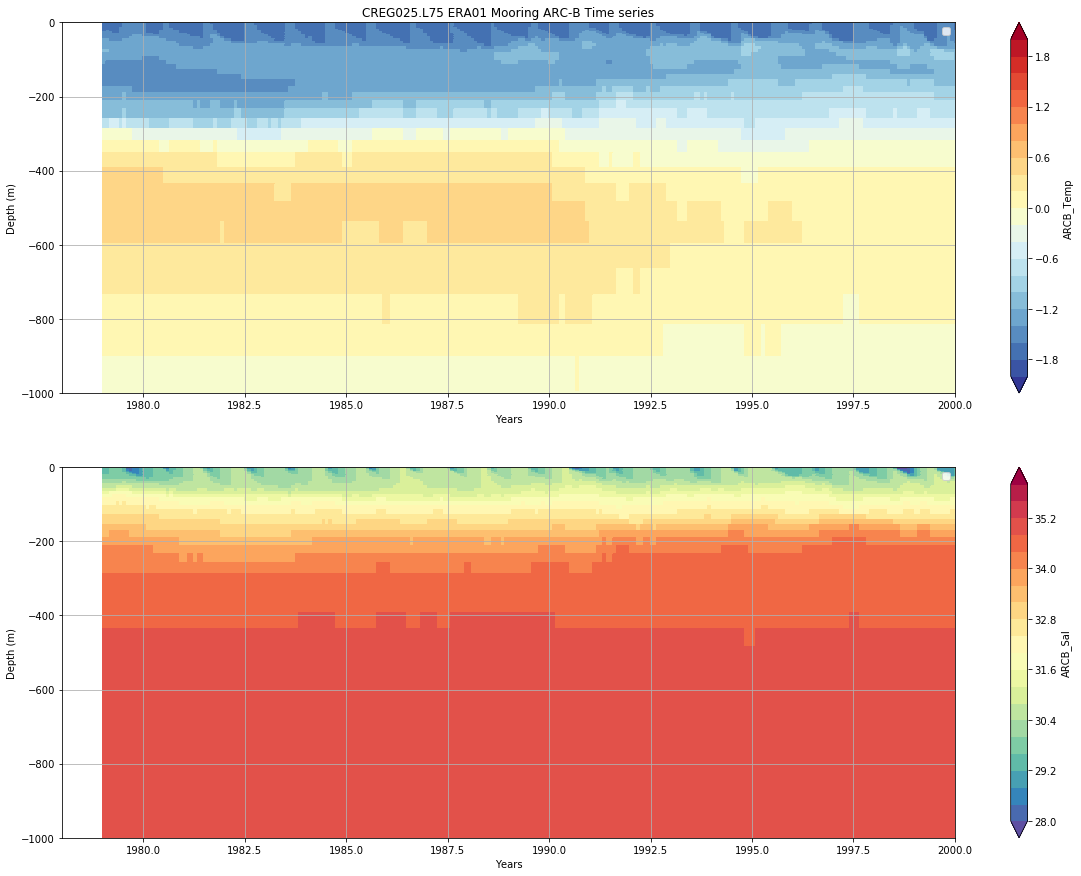

In [24]:
year_min=1978
year_max=2000
plt.figure(figsize=(20,15))
plt.subplot(211)
New_ARCB_ERA01['ARCB_Temp'].plot(levels=21,vmin=-2.,vmax=2.,cmap='RdYlBu_r',extend='both')
plt.xlim([year_min,year_max])
plt.ylim([-1000,0])
plt.xlabel('Years')
plt.title('CREG025.L75 ERA01 Mooring ARC-B Time series')
plt.ylabel('Depth (m)')
plt.grid(True)
plt.legend()

plt.subplot(212)
New_ARCB_ERA01['ARCB_Sal'].plot(levels=21,vmin=28.,vmax=36.,cmap='Spectral_r',extend='both')
plt.xlim([year_min,year_max])
plt.ylim([-1000.,0.])
plt.xlabel('Years')
plt.ylabel('Depth (m)')
plt.grid(True)
plt.legend()

# EURA

In [28]:
filein="CREG025.L75-ERA01_MOOR-EUR-B_y2019LASTy.nc"

ds_ERA01E=xr.open_dataset(MPATH+filein)
ds_ERA01E

<xarray.Dataset>
Dimensions:  (time: 480, z: 75)
Dimensions without coordinates: time, z
Data variables:
    Temp     (z, time) float32 ...
    Sal      (z, time) float32 ...
    Time2D   (z, time) float32 ...
    Depth2D  (z, time) float32 ...
Attributes:
    description:  Diagnostics have been calculated using the Arctic monitorin...
    date:         Wed Aug 26 13:59:55 GMT 2020\n

In [29]:
#
New_EURA_ERA01=xr.Dataset()
New_EURA_ERA01.coords['z']=ds_ERA01E['Depth2D'][:,0]
New_EURA_ERA01.coords['time']=ds_ERA01E['Time2D'][0,:]
New_EURA_ERA01['EURA_Temp']=(('z','time'),ds_ERA01E['Temp'])
New_EURA_ERA01['EURA_Sal']=(('z','time'),ds_ERA01E['Sal'])

No handles with labels found to put in legend.
No handles with labels found to put in legend.


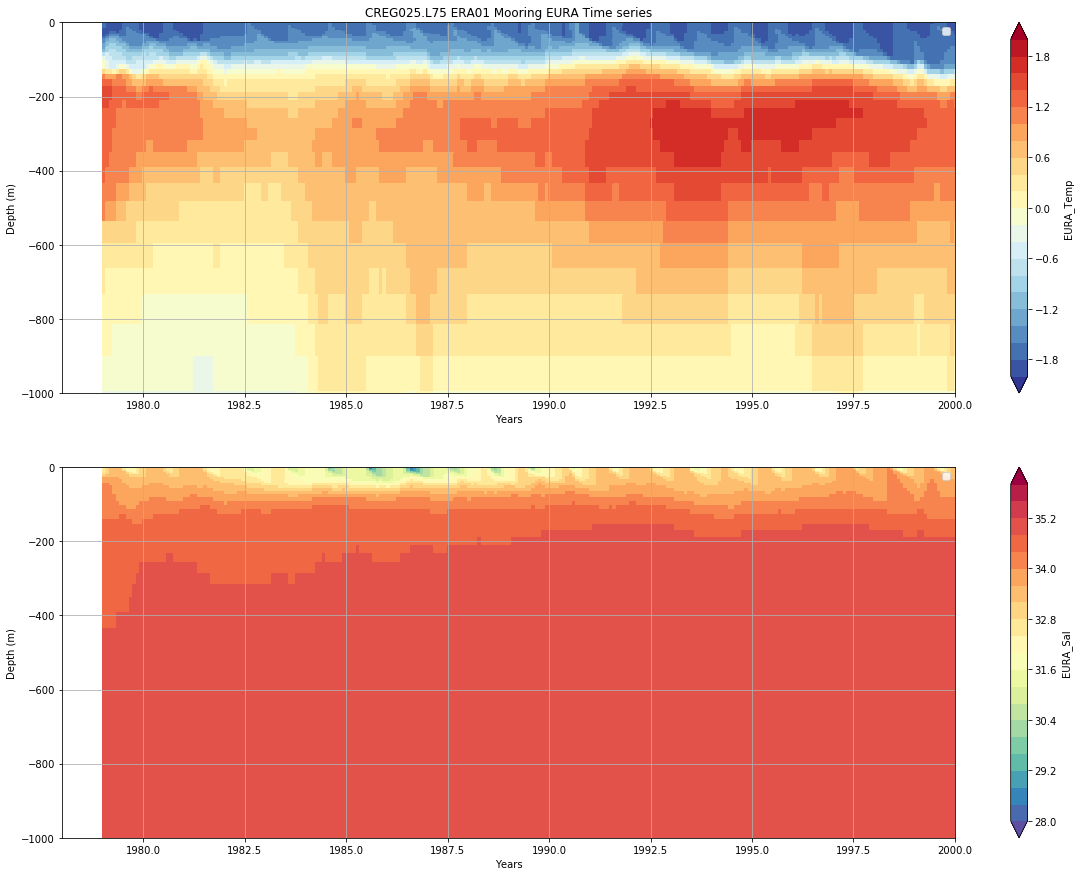

In [31]:
year_min=1978
year_max=2000
# FullTime year_max=2018
plt.figure(figsize=(20,15))
plt.subplot(211)
New_EURA_ERA01['EURA_Temp'].plot(levels=21,vmin=-2.,vmax=2.,cmap='RdYlBu_r',extend='both')
plt.xlim([year_min,year_max])
plt.ylim([-1000,0])
plt.xlabel('Years')
plt.title('CREG025.L75 ERA01 Mooring EURA Time series')
plt.ylabel('Depth (m)')
plt.grid(True)
plt.legend()

plt.subplot(212)
New_EURA_ERA01['EURA_Sal'].plot(levels=21,vmin=28.,vmax=36.,cmap='Spectral_r',extend='both')
plt.xlim([year_min,year_max])
plt.ylim([-1000.,0.])
plt.xlabel('Years')
plt.ylabel('Depth (m)')
plt.grid(True)
plt.legend()